# Project Name: Strava Fitness Data Analytics

## Project Summary
### 1. Project Objective

The goal of this project is to analyze smart device usage data to uncover user behavior patterns related to activity, sleep, and heart rate. This insight will guide **Bellabeat's marketing strategy** by identifying user trends, improving engagement, and supporting data-driven business decisions.

The analysis is based on **Strava fitness tracker data**, used as a **proxy** to simulate real-world usage of Bellabeat’s wellness devices.

---

### 2. Dataset Overview

We use five core datasets capturing different aspects of user behavior through wearable device data:

- **`daily_df`**: Daily aggregated activity metrics
- **`hourly_df`**: Hourly activity, intensity, and calorie burn
- **`minute_df`**: Minute-level data of steps and intensity
- **`heartbeat_df`**: Heart rate tracking by timestamp
- **`sleepday_df`**: Sleep duration and bed time data

These datasets enable comprehensive time-based and behavior-based analysis of users.

---

### 3. Feature-wise Explanation

####  `daily_df` – Daily Activity Metrics
- `TotalSteps`, `TotalDistance`: Total daily movement
- `VeryActiveDistance`, `ModeratelyActiveDistance`, `LightActiveDistance`: Distance covered at different activity intensities
- `VeryActiveMinutes`, `FairlyActiveMinutes`, `LightlyActiveMinutes`: Time spent in corresponding intensity zones
- `SedentaryMinutes`, `SedentaryActiveDistance`: Inactivity tracking
- `Calories`: Total calories burned daily

####  `hourly_df` – Hourly Intensity & Calories
- `ActivityHour`: Hourly timestamps
- `StepTotal`: Number of steps taken per hour
- `TotalIntensity`, `AverageIntensity`: Effort level recorded each hour
- `Calories`: Calories burned per hour

####  `minute_df` – Fine-Grained Activity
- `ActivityMinute`: Minute-level timestamps
- `Steps`, `Calories`, `METs`, `Intensity`: Energy expenditure and step count per minute

####  `heartbeat_df` – Heart Rate Monitoring
- `Time`: Timestamps of heart rate readings
- `Value`: Heart rate in beats per minute (BPM)

####  `sleepday_df` – Sleep Metrics
- `SleepDay`: Date of sleep record
- `TotalMinutesAsleep`: Total duration of actual sleep
- `TotalTimeInBed`: Total time spent in bed
- `TotalSleepRecords`: Number of sleep segments per night

---

### 4. Use Cases

1. **Activity Trend Identification**  
   Track patterns in movement across days and hours to detect user engagement windows.

2. **Calorie Burn vs. Intensity Analysis**  
   Understand how varying intensity levels (e.g., very active minutes) impact calorie expenditure.

3. **Sleep Efficiency Insights**  
   Evaluate how long users sleep vs. how long they stay in bed to suggest sleep quality improvements.

4. **Heart Rate Analysis**  
   Use BPM patterns to evaluate fitness levels, stress, or cardiovascular health over time.


## GitHub Link
https://github.com/AkashBommidi27/Strava-Fitness-Data-Analytics

## Problem Statement

In the rapidly growing smart device and wellness technology industry, understanding how users interact with fitness trackers is critical for shaping product strategy and marketing decisions. Bellabeat, a company specializing in smart health devices for women, aims to strengthen its position in the market by leveraging data-driven insights.

However, Bellabeat lacks deep visibility into **how consumers actually use their devices on a daily basis**, including activity levels, sleep patterns, and heart rate trends. Without these insights, the company risks missing key opportunities to improve user engagement, personalize features, and align their marketing strategies with real-world usage behavior.

This project addresses the need to:

- Identify **patterns** in activity, sleep, and heart rate data
- Evaluate **user behavior trends** across different times and days
- Determine the **relationship between physical effort and energy expenditure**
- Uncover actionable insights that can guide **Bellabeat’s marketing, product development, and customer segmentation**

Using Strava fitness tracking data as a proxy, this analysis will simulate how Bellabeat users might behave and help uncover what strategies Bellabeat can adopt to increase user satisfaction and brand competitiveness.


## Data Loading

**Suppress warnings**

In [ ]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

**Import Modules**

In [ ]:
import pandas as pd        # For data manipulation and analysis
import seaborn as sns      # For statistical visualizations
import matplotlib.pyplot as plt  # For creating basic plots and charts

### Load Files from Drive link

The following code automates the process of:
- Downloading a ZIP file containing multiple CSV datasets from Google Drive using `gdown`.
- Extracting the contents into a local `./datasets` directory.
- Listing all CSV files inside the `Data Files` folder.
- Loading each CSV into a separate DataFrame (`df1`, `df2`, ...), and printing the mapping of filenames to variable names.


Google Drive Link : https://drive.google.com/file/d/1DPc5i-hLXxBgFZF3pTNmx_M9flmKgjdC/view?usp=sharing

In [ ]:
# Install gdown
!pip install -q gdown

import gdown
import os

# Shared file setup
file_id = '1DPc5i-hLXxBgFZF3pTNmx_M9flmKgjdC'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the zip
gdown.download(url, 'datasets.zip', quiet=False)

# Unzip into ./datasets
!unzip -q datasets.zip -d ./datasets

# Folder containing the CSV files
data_folder = './datasets/Data Files'
print("Available files in 'Data Files':")
print(os.listdir(data_folder))

# Get all CSV files
csv_files = sorted([f for f in os.listdir(data_folder) if f.endswith('.csv')])

# Load each CSV as df1, df2, ... and print the mapping
for i, file in enumerate(csv_files):
    df_var_name = f'df{i+1}'
    file_path = os.path.join(data_folder, file)
    globals()[df_var_name] = pd.read_csv(file_path)
    print(f"{df_var_name} ← '{file}'")

Downloading...
From (original): https://drive.google.com/uc?id=1DPc5i-hLXxBgFZF3pTNmx_M9flmKgjdC
From (redirected): https://drive.google.com/uc?id=1DPc5i-hLXxBgFZF3pTNmx_M9flmKgjdC&confirm=t&uuid=8acdee23-4b0d-468a-814b-faff6afce9de
To: /content/datasets.zip
100%|██████████| 27.7M/27.7M [00:00<00:00, 41.7MB/s]


Available files in 'Data Files':
['hourlySteps_merged.csv', 'hourlyCalories_merged.csv', 'minuteIntensitiesNarrow_merged.csv', 'minuteStepsNarrow_merged.csv', 'dailyIntensities_merged.csv', 'weightLogInfo_merged.csv', 'minuteMETsNarrow_merged.csv', 'minuteCaloriesWide_merged.csv', 'minuteIntensitiesWide_merged.csv', 'dailySteps_merged.csv', 'hourlyIntensities_merged.csv', 'dailyCalories_merged.csv', 'sleepDay_merged.csv', 'minuteStepsWide_merged.csv', 'heartrate_seconds_merged.csv', 'minuteCaloriesNarrow_merged.csv', 'dailyActivity_merged.csv', 'minuteSleep_merged.csv']
df1 ← 'dailyActivity_merged.csv'
df2 ← 'dailyCalories_merged.csv'
df3 ← 'dailyIntensities_merged.csv'
df4 ← 'dailySteps_merged.csv'
df5 ← 'heartrate_seconds_merged.csv'
df6 ← 'hourlyCalories_merged.csv'
df7 ← 'hourlyIntensities_merged.csv'
df8 ← 'hourlySteps_merged.csv'
df9 ← 'minuteCaloriesNarrow_merged.csv'
df10 ← 'minuteCaloriesWide_merged.csv'
df11 ← 'minuteIntensitiesNarrow_merged.csv'
df12 ← 'minuteIntensitiesWide

## SQL Part


In [ ]:
import sqlite3

# Create an in-memory SQLite database
conn = sqlite3.connect(':memory:')

In [ ]:
# Automatically push all dfN variables into SQL tables
for i in range(1, len(csv_files) + 1):
    df_var = globals()[f'df{i}']
    df_var.to_sql(f'df{i}', conn, index=False, if_exists='replace')

### Merging `daily` datasets

In [ ]:
# Display column names of dailyActivity_merged.csv
print(df1.columns)

# Display column names of dailyCalories_merged.csv
print(df2.columns)

# Display column names of dailyIntensities_merged.csv
print(df3.columns)

# Display column names of dailySteps_merged.csv
print(df4.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityDay', 'Calories'], dtype='object')
Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')
Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')


In [ ]:
# Create a new reference 'daily_df' for the dailyActivity_merged dataset
daily_df = df1

`df1` (dailyActivity_merged.csv) is used as `daily_df` since it combines all columns from `df2`, `df3`, and `df4`. This merged dataset simplifies analysis by avoiding redundancy.

### Merging `hourly` datasets

In [ ]:
# Display column names of hourlyCalories_merged.csv
print(df6.columns)

# Display column names of hourlyIntensities_merged.csv
print(df7.columns)

# Display column names of hourlySteps_merged.csv
print(df8.columns)

Index(['Id', 'ActivityHour', 'Calories'], dtype='object')
Index(['Id', 'ActivityHour', 'TotalIntensity', 'AverageIntensity'], dtype='object')
Index(['Id', 'ActivityHour', 'StepTotal'], dtype='object')


In [ ]:
# SQL JOIN to combine data from calories, intensities, and steps
query = '''
SELECT
    df6.Id,                      -- User ID
    df6.ActivityHour,           -- Timestamp (hourly)
    df6.Calories,               -- Calories burned
    df7.TotalIntensity,         -- Total activity intensity
    df7.AverageIntensity,       -- Average intensity level
    df8.StepTotal               -- Number of steps taken
FROM df6
JOIN df8 ON df6.Id = df8.Id AND df6.ActivityHour = df8.ActivityHour  -- Join steps data
JOIN df7 ON df6.Id = df7.Id AND df6.ActivityHour = df7.ActivityHour  -- Join intensity data
'''

# Execute SQL query and load the result into a new DataFrame
hourly_df = pd.read_sql_query(query, conn)

# Preview the combined hourly data
hourly_df.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,81,20,0.333333,373
1,1503960366,4/12/2016 1:00:00 AM,61,8,0.133333,160
2,1503960366,4/12/2016 2:00:00 AM,59,7,0.116667,151
3,1503960366,4/12/2016 3:00:00 AM,47,0,0.000000,0
4,1503960366,4/12/2016 4:00:00 AM,48,0,0.000000,0


### Merging `minute` datasets

In [ ]:
# Display column names of minuteCaloriesNarrow_merged.csv
print(df9.columns)

# Display column names of minuteIntensitiesNarrow_merged.csv
print(df11.columns)

# Display column names of minuteMETsNarrow_merged.csv
print(df13.columns)

# Display column names of minuteStepsNarrow_merged.csv
print(df15.columns)

Index(['Id', 'ActivityMinute', 'Calories'], dtype='object')
Index(['Id', 'ActivityMinute', 'Intensity'], dtype='object')
Index(['Id', 'ActivityMinute', 'METs'], dtype='object')
Index(['Id', 'ActivityMinute', 'Steps'], dtype='object')


In [ ]:
# Create a SQL JOIN query to combine minute-level data from multiple sources
query = '''
SELECT
    df9.Id,                      -- User ID
    df9.ActivityMinute,         -- Timestamp (minute-level)
    df15.Steps,                 -- Steps taken at that minute
    df9.Calories,               -- Calories burned at that minute
    df13.METs,                  -- Metabolic equivalent (energy expended)
    df11.Intensity              -- Activity intensity level
FROM df9
JOIN df13 ON df9.Id = df13.Id AND df9.ActivityMinute = df13.ActivityMinute  -- Join METs data
JOIN df15 ON df9.Id = df15.Id AND df9.ActivityMinute = df15.ActivityMinute  -- Join steps data
JOIN df11 ON df9.Id = df11.Id AND df9.ActivityMinute = df11.ActivityMinute  -- Join intensity data
'''

# Execute the SQL query and load the result into a new DataFrame
minute_df = pd.read_sql_query(query, conn)

# Display the first few rows of the combined minute-level dataset
minute_df.head()

,Id,ActivityMinute,Steps,Calories,METs,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0,0.7865,10,0
1,1503960366,4/12/2016 12:01:00 AM,0,0.7865,10,0
2,1503960366,4/12/2016 12:02:00 AM,0,0.7865,10,0
3,1503960366,4/12/2016 12:03:00 AM,0,0.7865,10,0
4,1503960366,4/12/2016 12:04:00 AM,0,0.7865,10,0


In [ ]:
# Rename sleepDay_merged dataset to sleepday_df for easier reference
sleepday_df = df17

In [ ]:
# Rename heartrate_seconds_merged dataset to heartbeat_df for clarity
heartbeat_df = df5

### Final DataFrames

In [ ]:
daily_df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [ ]:
hourly_df.columns

Index(['Id', 'ActivityHour', 'Calories', 'TotalIntensity', 'AverageIntensity',
       'StepTotal'],
      dtype='object')

In [ ]:
minute_df.columns

Index(['Id', 'ActivityMinute', 'Steps', 'Calories', 'METs', 'Intensity'], dtype='object')

In [ ]:
heartbeat_df.columns

Index(['Id', 'Time', 'Value'], dtype='object')

In [ ]:
sleepday_df.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

Final DataFrames Summary

- **`daily_df`**: Daily activity summary (steps, distance, calories, etc.).
- **`hourly_df`**: Merged hourly data for calories, steps, and intensity.
- **`minute_df`**: Minute-level data combining steps, calories, METs, and intensity.
- **`heartbeat_df`**: Second-level heart rate readings.
- **`sleepday_df`**: Daily sleep summary including total sleep and time in bed.

These DataFrames are cleaned, merged, and ready for analysis

## Data Visualization and Interpretation

### Daily Activity Patterns (daily_df)

#### Visualization 1: Distribution of Total Steps

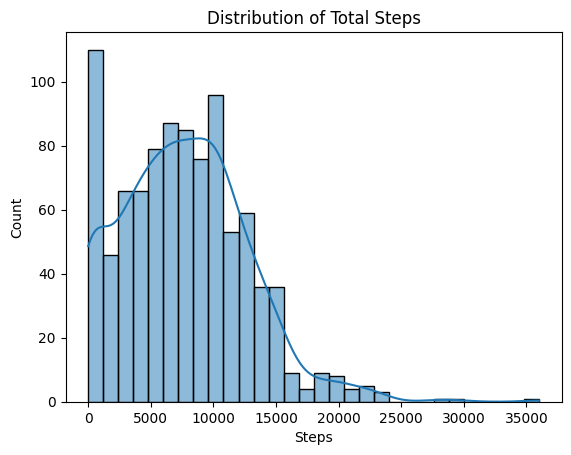

In [ ]:
# Plot histogram of Total Steps with KDE curve
sns.histplot(daily_df['TotalSteps'], kde=True, bins=30)

# Add title and axis label
plt.title('Distribution of Total Steps')
plt.xlabel('Steps')

# Show the plot
plt.show()

The histogram with a kernel density estimate (KDE) curve illustrates the distribution of total steps. The data is right-skewed, with most individuals taking between 0 and 15,000 steps, peaking around 5,000 steps. A smaller number of individuals exceed 20,000 steps, with the distribution tapering off toward 35,000 steps. This suggests that while moderate activity is common, high step counts are less frequent.

#### Visualization 2: Distribution of Calories

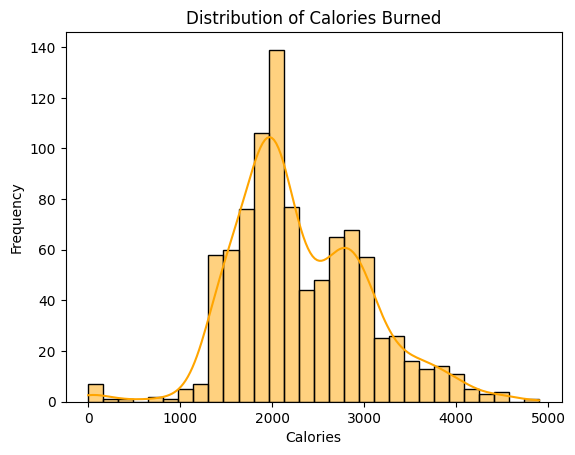

In [ ]:
# Plot histogram of Calories burned with KDE curve
sns.histplot(daily_df['Calories'], kde=True, bins=30, color='orange')

# Add title and x-axis label
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Display the plot
plt.show()

The histogram with a kernel density estimate (KDE) curve shows the distribution of calories burned. The data is right-skewed, with most individuals burning between 0 and 3,000 calories, peaking around 2,000 calories. Fewer individuals burn above 3,000 calories, with the distribution tapering off toward 5,000 calories. This indicates that moderate calorie burn is common, while higher calorie burn is less frequent.

#### Visualization 3: Distribution of Total Distance

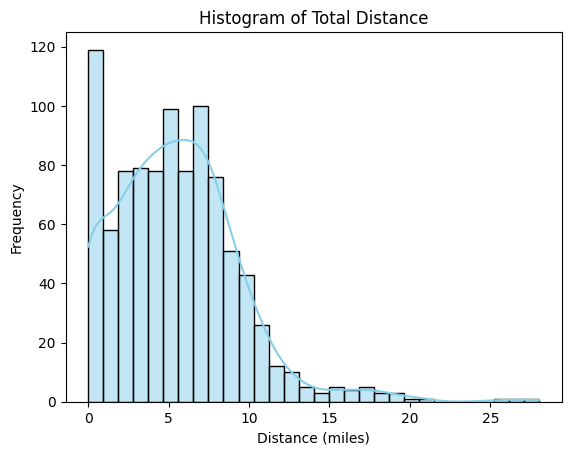

In [ ]:
# Plot histogram of Total Distance with KDE curve
sns.histplot(data=daily_df, x='TotalDistance', color='skyblue', bins=30, kde=True)

# Add title and axis labels
plt.title('Histogram of Total Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

The histogram with a kernel density estimate (KDE) curve displays the distribution of total distance traveled in miles. The data is right-skewed, with most individuals traveling between 0 and 10 miles, peaking around 2-3 miles. Fewer individuals travel beyond 10 miles, with the distribution tapering off toward 25 miles. This indicates that shorter distances are more common, while longer distances are less frequent.

In [ ]:
# Convert 'ActivityDate' to datetime format
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'])

# Extract day of the week from the date
daily_df['DayOfWeek'] = daily_df['ActivityDate'].dt.day_name()

# Define custom weekday order for consistent plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#### Visualization 4: Average Total Steps by Day

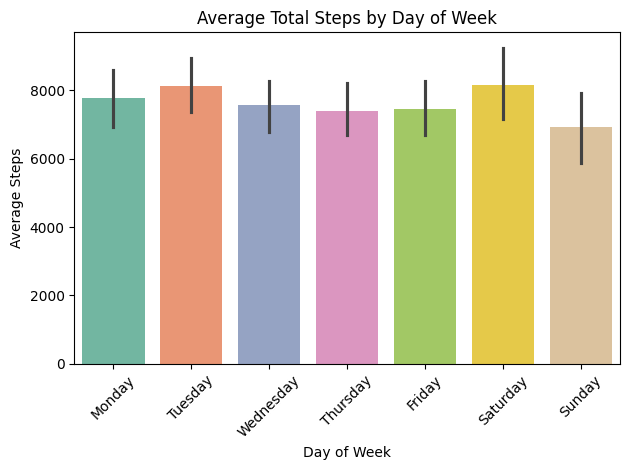

In [ ]:
# Bar plot of average total steps for each day of the week
sns.barplot(data=daily_df, x='DayOfWeek', y='TotalSteps', order=weekday_order, palette='Set2')

# Add title and axis labels
plt.title('Average Total Steps by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart displays the average total steps taken each day of the week. The average steps remain relatively consistent, ranging between approximately 6,000 and 8,000 steps per day. Tuesday and Saturday show the highest averages, close to 8,000 steps, while Sunday has the lowest average, around 6,000 steps. This suggests a stable activity level throughout the week with slight increases on Tuesday and Saturday.

#### Visualization 5: Average Calories Burned by Day

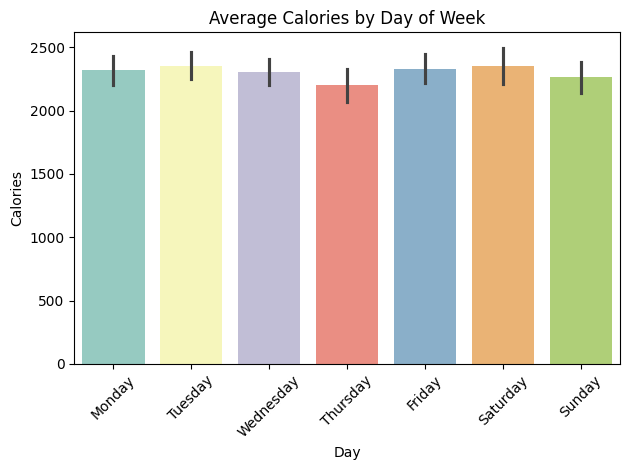

In [ ]:
# Bar plot of average calories burned for each day of the week
sns.barplot(data=daily_df, x='DayOfWeek', y='Calories', order=weekday_order, palette='Set3')

# Add title and axis labels
plt.title('Average Calories by Day of Week')
plt.xlabel('Day')
plt.ylabel('Calories')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The bar chart illustrates the average calories burned each day of the week. The average calories burned are fairly consistent, ranging between approximately 2,000 and 2,500 calories per day. Saturday shows the highest average, around 2,500 calories, while Thursday has the lowest, around 2,000 calories. This suggests stable calorie expenditure throughout the week with a slight peak on Saturday.

#### Visualization 6: Average Distance by Type and Day


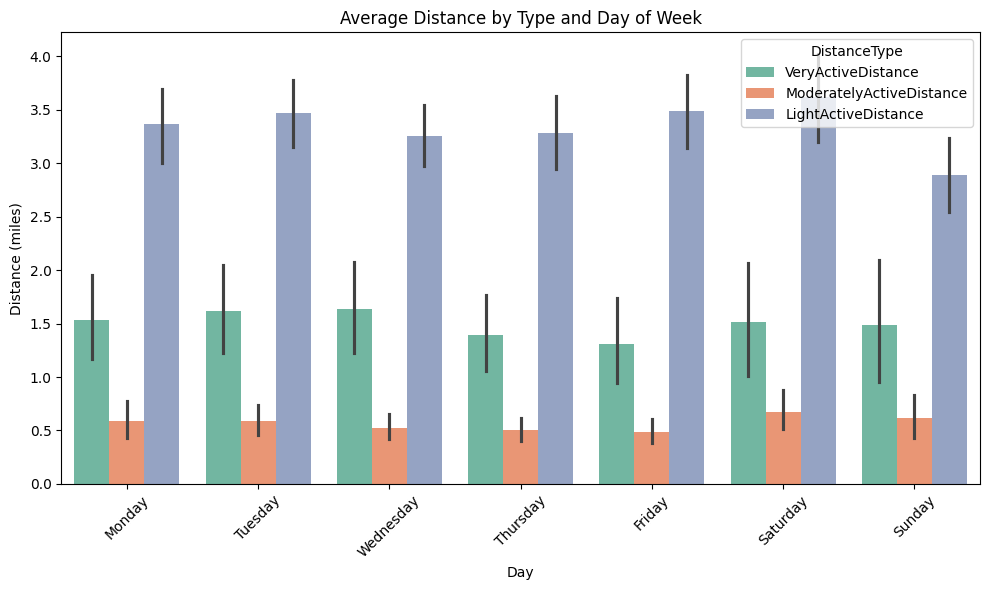

In [ ]:
# Select and reshape distance columns for grouped bar plot
distance_cols = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']
df_dist = daily_df[['DayOfWeek'] + distance_cols].melt(id_vars='DayOfWeek', var_name='DistanceType', value_name='Distance')

# Set figure size and create grouped bar plot by distance type and weekday
plt.figure(figsize=(10, 6))
sns.barplot(data=df_dist, x='DayOfWeek', y='Distance', hue='DistanceType', order=weekday_order, palette='Set2')

# Add plot title and labels
plt.title('Average Distance by Type and Day of Week')
plt.xlabel('Day')
plt.ylabel('Distance (miles)')

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


The bar chart shows the average distance by type (VeryActive, ModeratelyActive, LightActive) for each day of the week. LightActiveDistance (blue) consistently dominates, averaging around 3 miles daily, with slight peaks on Tuesday and Saturday. VeryActiveDistance (green) averages around 1.5 miles, with a noticeable dip on Thursday. ModeratelyActiveDistance (orange) remains the lowest, around 0.5 miles daily, with minor variations. This suggests that light activity constitutes the majority of daily distance, while very and moderately active distances are less frequent.

#### Visualization 7: Average Activity Minutes by Day


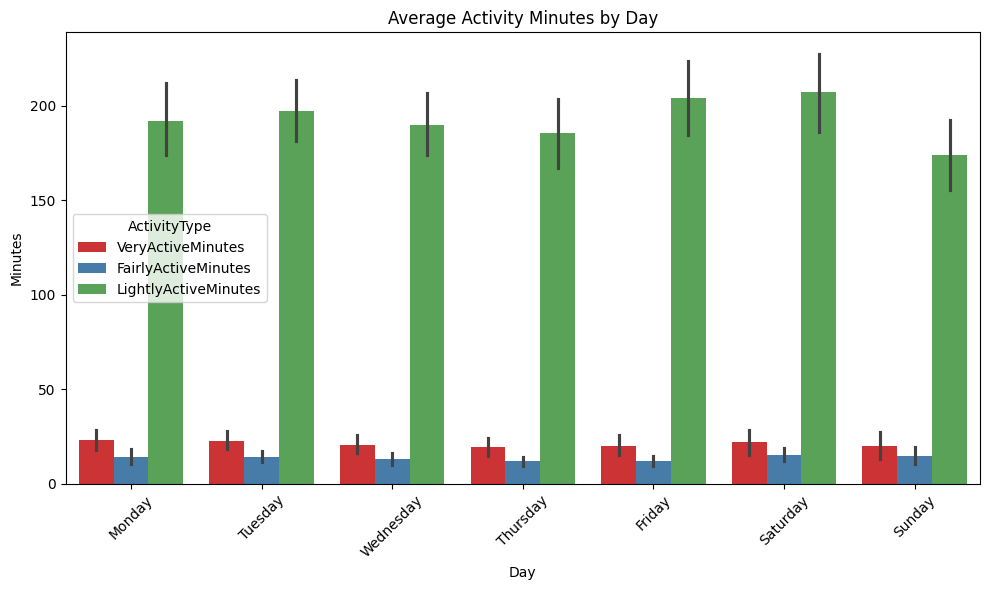

In [ ]:
# Select and reshape activity minutes data for grouped bar plot
activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
df_act = daily_df[['DayOfWeek'] + activity_cols].melt(id_vars='DayOfWeek', var_name='ActivityType', value_name='Minutes')

# Create grouped bar plot for activity minutes by day and type
plt.figure(figsize=(10, 6))
sns.barplot(data=df_act, x='DayOfWeek', y='Minutes', hue='ActivityType', order=weekday_order, palette='Set1')

# Add plot title and axis labels
plt.title('Average Activity Minutes by Day')
plt.xlabel('Day')
plt.ylabel('Minutes')

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The bar chart displays the average activity minutes by type (VeryActive, FairlyActive, LightlyActive) for each day of the week. LightlyActiveMinutes (green) dominate, averaging around 200 minutes daily, with slight peaks on Saturday and Sunday. VeryActiveMinutes (red) and FairlyActiveMinutes (blue) are much lower, averaging around 25 minutes each, with minor daily variations. This indicates that light activity constitutes the majority of daily active time, while very and fairly active minutes are less frequent.

#### Visualization 8: Total Steps Distribution by Day

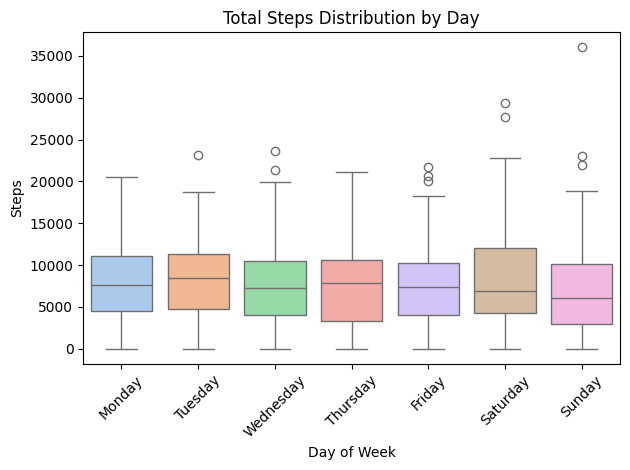

In [ ]:
# Box plot to show distribution of total steps across weekdays
sns.boxplot(data=daily_df, x='DayOfWeek', y='TotalSteps', order=weekday_order, palette='pastel')

# Add title and axis labels
plt.title('Total Steps Distribution by Day')
plt.xlabel('Day of Week')
plt.ylabel('Steps')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The box plot illustrates the distribution of total steps by day of the week. The median steps hover around 5,000 to 10,000 across all days, with Tuesday and Saturday showing slightly higher medians. Each day exhibits a wide range, with some individuals reaching up to 25,000–35,000 steps, as indicated by the outliers. The interquartile ranges (IQR) are relatively consistent, suggesting similar variability in step counts across the week, with a slight increase in spread on weekends.

#### Visualization 9: Total Calories Burned Per Day

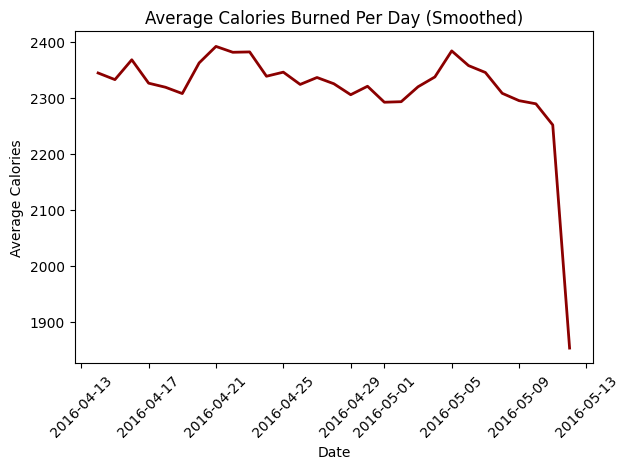

In [ ]:
# Group by date and calculate the average calories burned per day
calories_by_date = daily_df.groupby('ActivityDate')['Calories'].mean().rolling(3).mean()

# Plot the 3-day rolling average of daily average calories
plt.plot(calories_by_date.index, calories_by_date.values, color='darkred', linewidth=2)

# Add plot title and axis labels
plt.title('Average Calories Burned Per Day (Smoothed)')
plt.xlabel('Date')
plt.ylabel('Average Calories')

# Rotate x-axis labels and adjust layout for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The line plot displays the 3-day rolling average of calories burned per day from April 13, 2016, to May 13, 2016. Initially, the average calories burned fluctuate between 2,200 and 2,400 calories, with minor peaks around April 17 and April 29. However, a significant downward trend begins around May 1, dropping sharply to around 1,900 calories by May 13. This suggests a notable decrease in activity levels toward the end of the period.

#### Visualization 10: Total Steps over time

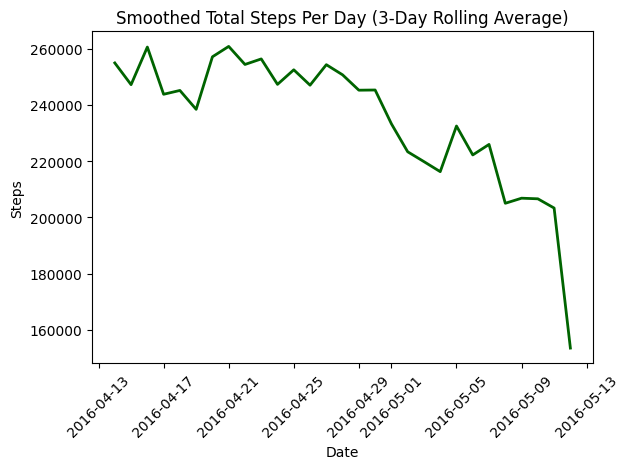

In [ ]:
# Group data by date and sum total steps across all users
df_steps = daily_df.groupby('ActivityDate')['TotalSteps'].sum().reset_index()

# Apply 3-day rolling average to smooth the step count trend
df_steps['Steps_Smoothed'] = df_steps['TotalSteps'].rolling(window=3).mean()

# Plot the smoothed total steps over time
plt.plot(df_steps['ActivityDate'], df_steps['Steps_Smoothed'], color='darkgreen', linewidth=2)

# Add plot title and axis labels
plt.title('Smoothed Total Steps Per Day (3-Day Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Steps')

# Rotate x-axis labels and improve layout spacing
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The line plot shows the 3-day rolling average of total steps per day from April 13, 2016, to May 13, 2016. The average steps start around 25,000, with fluctuations between 24,000 and 26,000 until April 29. A significant downward trend begins around May 1, with a sharp decline to around 16,000 steps by May 13. This indicates a notable reduction in activity levels toward the end of the period.

#### Visualization 11: Activity Minutes Breakdown (sample 10 days)

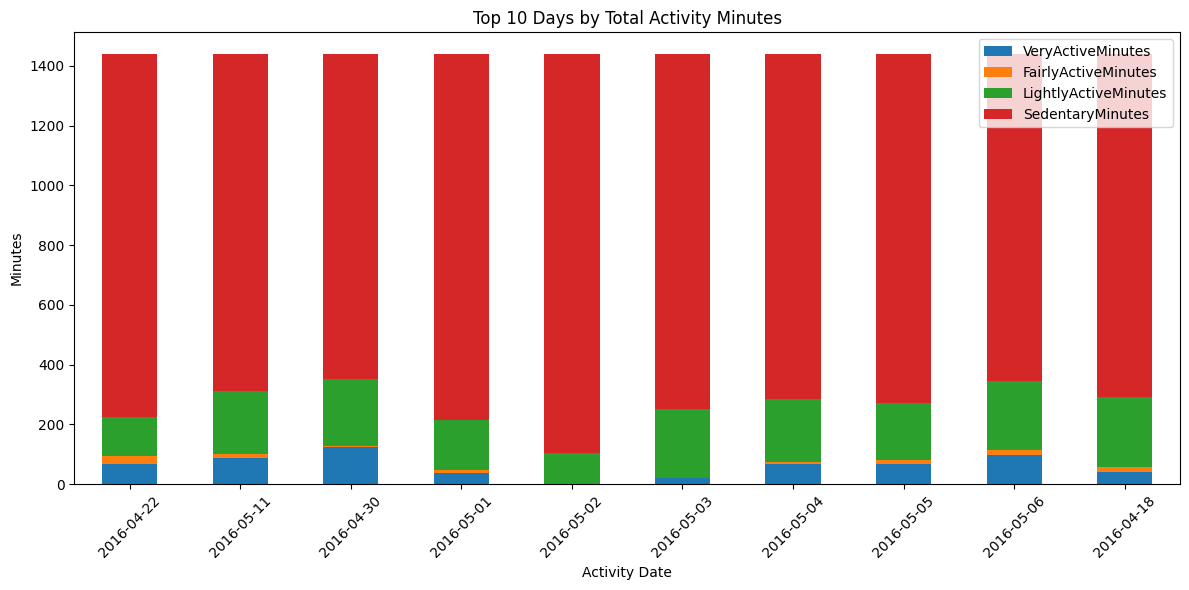

In [ ]:
# Define the activity-related columns to include in the analysis
activity_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

# Ensure 'ActivityDate' is in datetime format (if not already)
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'])

# Remove time portion, keeping only the date
daily_df['ActivityDate'] = daily_df['ActivityDate'].dt.date

# Calculate total activity minutes for each row (all types combined)
daily_df['TotalActivityMinutes'] = daily_df[activity_cols].sum(axis=1)

# Select the top 10 most active days based on total minutes
top10_activity = daily_df.sort_values('TotalActivityMinutes', ascending=False).head(10)

# Set the date as index for clear labeling on the x-axis
top10_activity = top10_activity.set_index('ActivityDate')

# Create a stacked bar plot showing the breakdown of activity types
top10_activity[activity_cols].plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize plot title and axis labels
plt.title('Top 10 Days by Total Activity Minutes')
plt.ylabel('Minutes')
plt.xlabel('Activity Date')

# Rotate x-axis labels and adjust layout for better readability
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()

The bar chart illustrates the top 10 days by total activity minutes between April 18, 2016, and May 11, 2016. SedentaryMinutes (red) dominate, consistently exceeding 1,000 minutes daily. LightlyActiveMinutes (green) average around 200–300 minutes, while VeryActiveMinutes (blue) and FairlyActiveMinutes (orange) are minimal, each under 50 minutes. This indicates that sedentary time significantly outweighs active time on the most active days.

#### Visualization 12: Average Time Spent in Activities

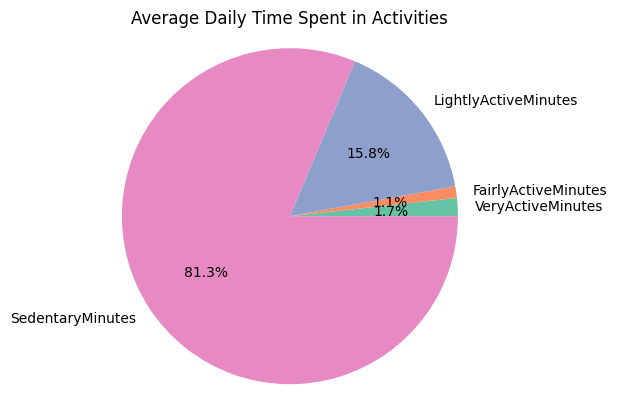

In [ ]:
# Calculate the average daily minutes spent in each activity type
activity_avg = daily_df[activity_cols].mean()

# Create a pie chart showing the proportion of time spent in each activity type
plt.pie(activity_avg,
        labels=activity_avg.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'))

# Add a title and make sure the pie is circular
plt.title('Average Daily Time Spent in Activities')
plt.axis('equal')  # Ensures pie is a circle

# Display the plot
plt.show()


The pie chart illustrates the average daily time spent in different activities. SedentaryMinutes dominate at 81.3%, indicating that the majority of the day is spent inactively. LightlyActiveMinutes account for 15.8%, while FairlyActiveMinutes and VeryActiveMinutes are minimal at 1.7% and 1.1%, respectively. This suggests that active time is limited, with most of the day spent in sedentary behavior.

#### Visualization 13: Calories Burned by Steps and Very Active Minutes

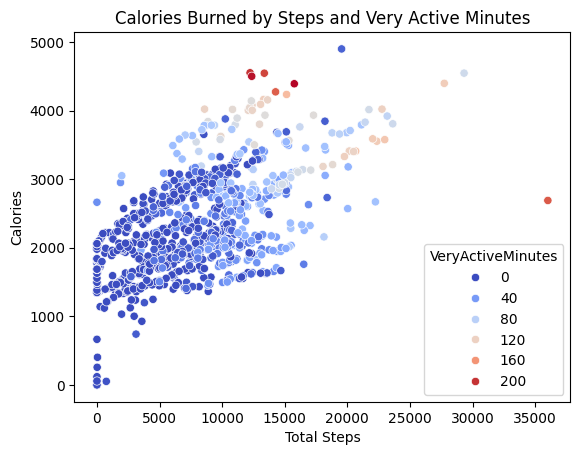

In [ ]:
# Create a scatter plot to examine the relationship between steps and calories
# Color points based on VeryActiveMinutes using a cool-to-warm color scale
sns.scatterplot(data=daily_df, x='TotalSteps', y='Calories', hue='VeryActiveMinutes', palette='coolwarm')

# Add plot title and axis labels
plt.title('Calories Burned by Steps and Very Active Minutes')
plt.xlabel('Total Steps')
plt.ylabel('Calories')

# Show the plot
plt.show()

The scatter plot illustrates the relationship between total steps, very active minutes, and calories burned. Most data points cluster between 0 and 15,000 steps, burning 1,000 to 3,000 calories, with very active minutes typically below 80 (blue and light blue). As steps increase beyond 15,000, calories burned rise to 3,000–5,000, with very active minutes reaching up to 200 (red). This suggests a positive correlation: higher steps and more very active minutes generally lead to greater calorie expenditure.

#### Visualization 14: Distance Type Distribution

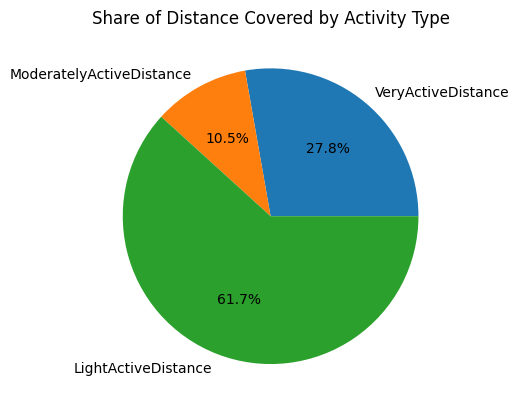

In [ ]:
# Select only the distance-related columns
distance_types = daily_df[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']]

# Plot the mean of each distance type as a pie chart
distance_types.mean().plot(kind='pie', autopct='%1.1f%%', title='Share of Distance Covered by Activity Type')

# Remove y-axis label for cleaner look
plt.ylabel('')

# Display the plot
plt.show()

The pie chart illustrates the share of distance covered by activity type. LightActiveDistance dominates at 61.7%, indicating that the majority of distance is covered through light activity. VeryActiveDistance accounts for 27.8%, while ModeratelyActiveDistance constitutes 10.5%. This suggests that light activity contributes the most to total distance, followed by very active efforts, with moderate activity being the least significant.

#### Visualization 15: Top 10 Most Active Users by TotalSteps

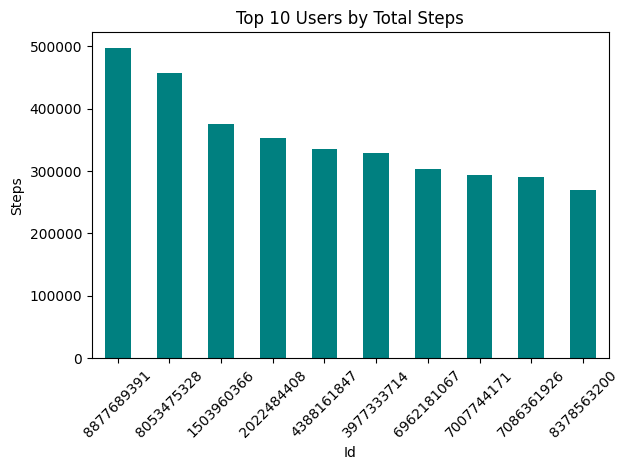

In [ ]:
# Group by user ID and calculate total steps per user, then sort in descending order
top_users = daily_df.groupby('Id')['TotalSteps'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 users by total steps as a bar chart
top_users.plot(kind='bar', color='teal')

# Add plot title and axis labels
plt.title('Top 10 Users by Total Steps')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

The bar chart displays the top 10 users by total steps. User 8877689391 leads with approximately 500,000 steps, followed by user 8053475328 with around 450,000 steps. The remaining users range between 200,000 and 350,000 steps, with a gradual decline from user 1503960366 to user 8378563200. This indicates a significant variation in activity levels among the top users, with the top two being notably more active.

#### Visualization 16: Heatmap – Correlation of All Variables

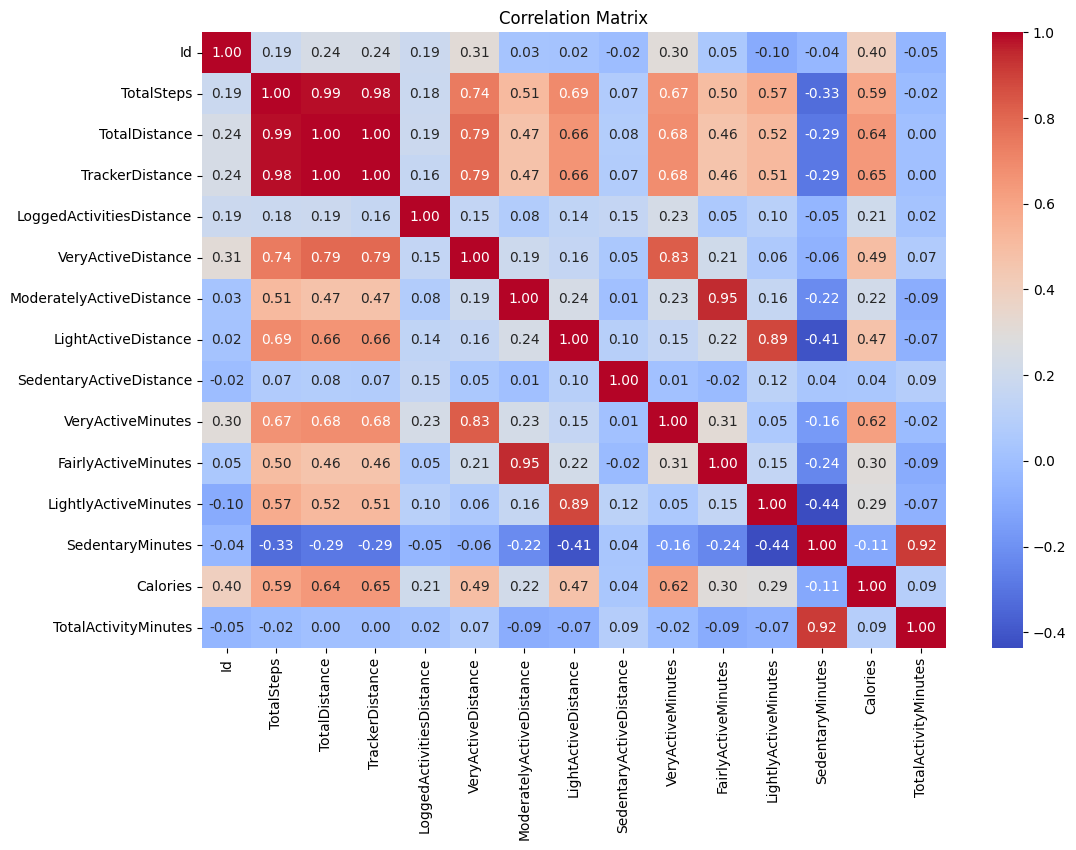

In [ ]:
# Compute correlation matrix for all numeric columns
corr = daily_df.select_dtypes(include='number').corr()

# Set figure size for better visibility
plt.figure(figsize=(12, 8))

# Plot heatmap with annotations and a diverging color palette
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

# Add title and display the heatmap
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix visualizes relationships between activity metrics.  
- Strong positive correlations (red) are observed between TotalSteps and TotalDistance (0.99), TrackerDistance (0.99), and VeryActiveDistance (0.74), indicating that higher steps strongly align with greater distances, especially very active ones.  
- Calories also show moderate positive correlations with TotalSteps (0.59) and TotalDistance (0.64).  
- Negative correlations (blue) are seen between SedentaryMinutes and active metrics like TotalSteps (-0.33) and LightlyActiveMinutes (-0.44), suggesting that more sedentary time reduces active engagement.  
- TotalActivityMinutes (sum of active minutes) has weak correlations with most variables, indicating it may not capture the intensity of activity effectively.

#### Visualization 17: Pairplot for Selected Features

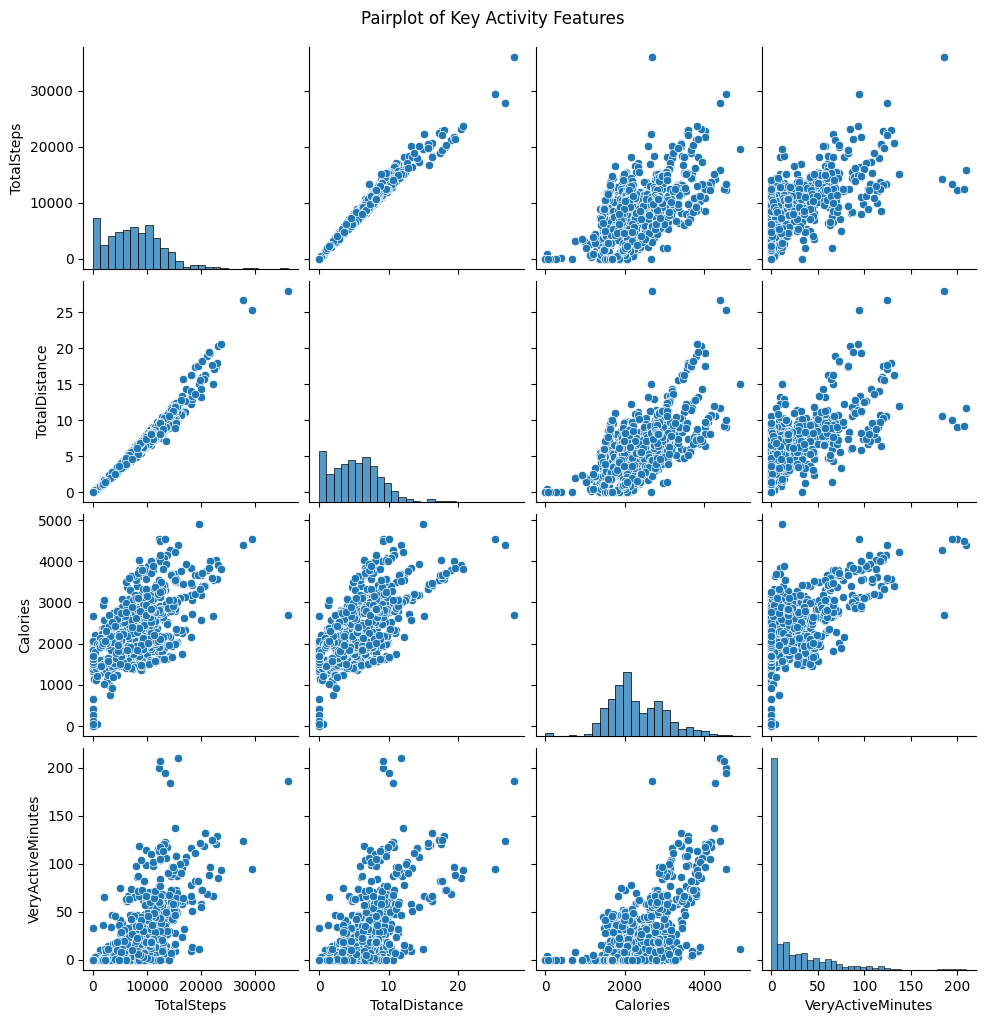

In [ ]:
# Create a pairplot to visualize relationships between key activity features
sns.pairplot(daily_df[['TotalSteps', 'TotalDistance', 'Calories', 'VeryActiveMinutes']])

# Add a title slightly above the plots
plt.suptitle('Pairplot of Key Activity Features', y=1.02)

# Display the pairplot
plt.show()

- The pairplot visualizes relationships between key activity features: TotalSteps, TotalDistance, Calories, and VeryActiveMinutes.
- Diagonal histograms show distributions: TotalSteps and TotalDistance are right-skewed, peaking around 5,000–10,000 steps/miles; Calories peak around 2,000–3,000; VeryActiveMinutes are heavily skewed, mostly below 50 minutes.
- Scatter plots reveal strong positive relationships between TotalSteps and TotalDistance, as well as between TotalSteps/TotalDistance and Calories, indicating that more steps or distance correlate with higher calorie burn.
- VeryActiveMinutes show a moderate positive relationship with TotalSteps, TotalDistance, and Calories, suggesting that longer very active periods contribute to higher steps, distance, and calorie expenditure.
- Outliers are visible, particularly in VeryActiveMinutes (up to 200 minutes) and TotalSteps (up to 35,000), indicating occasional high-intensity activity days.

### Hourly Patterns (hourly_df)

#### Visualization 18: Distribution of Total Intensity


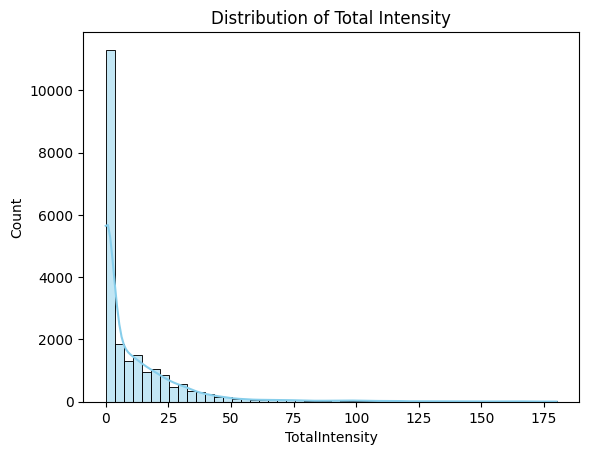

In [ ]:
# Plot the distribution of Total Intensity from hourly data
sns.histplot(hourly_df['TotalIntensity'], bins=50, kde=True, color='skyblue')

# Add title and label the x-axis
plt.title('Distribution of Total Intensity')
plt.xlabel('TotalIntensity')

# Show the plot
plt.show()

The histogram with a kernel density curve shows a right-skewed distribution of total intensity. Most values cluster near 0, with a peak count of ~12,000, dropping sharply as intensity rises. Few values exceed 50, with the tail extending to 175, indicating low-intensity events are common, with rare high-intensity outliers.

#### Visualization 19: Average Steps by Hour

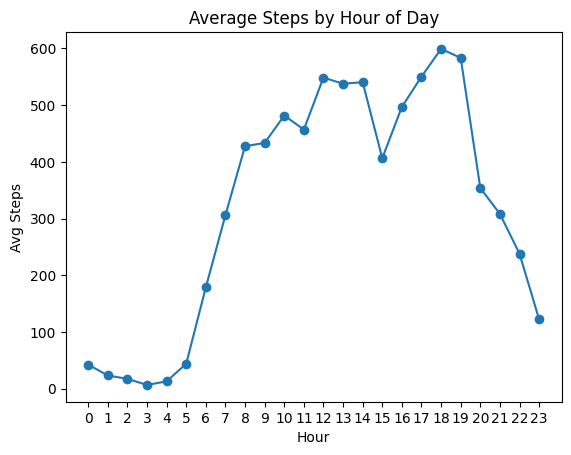

In [ ]:
# Convert 'ActivityHour' to datetime format
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'])

# Extract the hour from timestamp
hourly_df['Hour'] = hourly_df['ActivityHour'].dt.hour

# Compute average steps taken during each hour of the day
steps_by_hour = hourly_df.groupby('Hour')['StepTotal'].mean()

# Plot average steps per hour
plt.plot(steps_by_hour.index, steps_by_hour.values, marker='o')
plt.title('Average Steps by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Avg Steps')
plt.xticks(range(0, 24))  # Show all 24 hours on the x-axis
plt.show()

The line plot displays average steps by hour of the day, showing low activity (around 50 steps) from midnight to 5 AM. Steps increase steadily from 6 AM, peaking at ~550 steps around 10 AM and 3 PM, with a dip to ~400 steps at noon. Activity then declines sharply after 4 PM, dropping to ~100 steps by 10 PM, indicating higher activity during morning and early afternoon hours.

#### Visualization 20: Calories Burned vs. Step Count by Activity Intensity

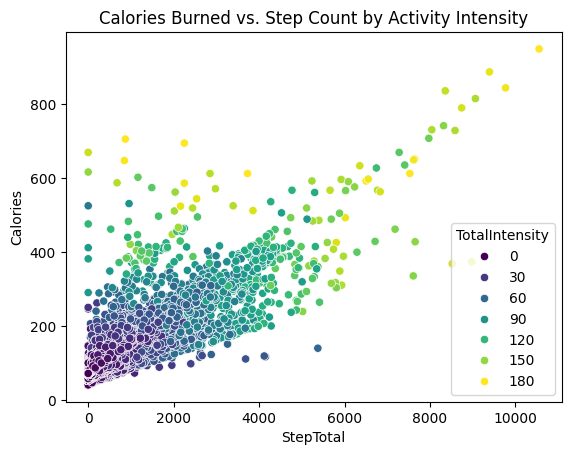

In [ ]:
# Create a scatter plot of steps vs. calories, colored by total intensity
sns.scatterplot(data=hourly_df, x='StepTotal', y='Calories', hue='TotalIntensity', palette='viridis')

# Add title and axis labels
plt.title('Calories Burned vs. Step Count by Activity Intensity')
plt.xlabel('StepTotal')
plt.ylabel('Calories')

# Display the plot
plt.show()

The scatter plot shows calories burned versus step count, color-coded by total intensity. Most data points cluster at lower steps (0–4000) and calories (0–400), with intensity around 0–60 (purple to blue). Higher intensities (90–180, green to yellow) correlate with higher steps (6000–10000) and calories (400–800), indicating a positive relationship where increased activity intensity leads to more steps and calories burned.

#### Visualization 21: Distribution of Total Intensity by Hour

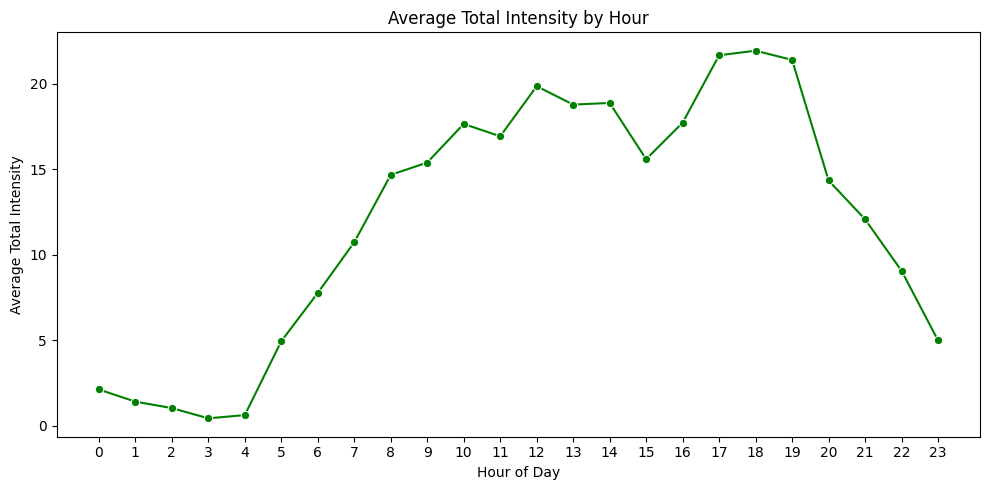

In [ ]:
# Extract the hour from the timestamp if not already present
hourly_df['Hour'] = pd.to_datetime(hourly_df['ActivityHour']).dt.hour

# Compute average total intensity for each hour of the day
avg_intensity_by_hour = hourly_df.groupby('Hour')['TotalIntensity'].mean().reset_index()

# Create a line plot with markers showing hourly average intensity
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_intensity_by_hour, x='Hour', y='TotalIntensity', marker='o', color='green')

# Add titles and labels
plt.title('Average Total Intensity by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Total Intensity')
plt.xticks(range(0, 24))  # Show all 24 hours

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

- The line plot shows average total intensity by hour of the day.
- Intensity is near 0 from midnight to 5 AM, indicating low activity.
- It rises steadily from 6 AM, peaking at ~20 around 10 AM and 3 PM.
- A dip occurs around noon to ~15, followed by another peak.
- Intensity drops sharply after 4 PM, reaching ~5 by 10 PM, showing higher activity in morning and early afternoon.

In [ ]:
# Convert 'ActivityHour' to datetime format
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'])

# Extract day of the week from the date
hourly_df['DayOfWeek'] = hourly_df['ActivityHour'].dt.day_name()

# Define custom weekday order for consistent plotting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#### Visualization 22: Avg Calories burnt Hourly by Day

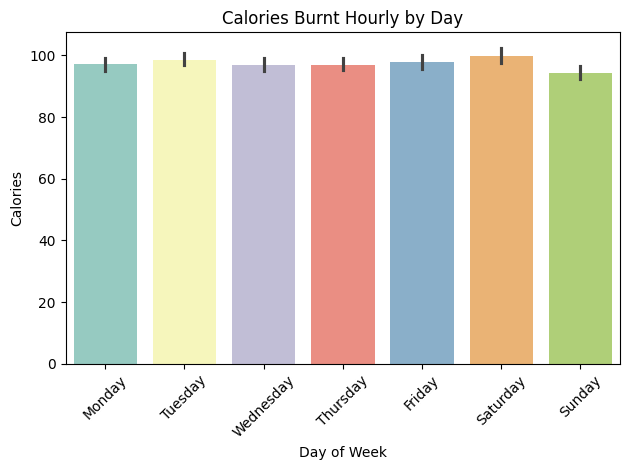

In [ ]:
# Bar plot of average hourly calories burned by day of the week
sns.barplot(data=hourly_df, x='DayOfWeek', y='Calories', order=weekday_order, palette='Set3')

# Set plot title and axis labels
plt.title('Calories Burnt Hourly by Day')
plt.xlabel('Day of Week')
plt.ylabel('Calories')

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

- The bar chart shows average hourly calories burned by day of the week.
- Each day has a similar calorie burn, ranging between 80–100 calories per hour.
- Saturday has the highest average at ~100 calories, while Sunday is slightly lower at ~90 calories.
- Weekdays (Monday–Friday) show consistent burns around 90–95 calories, with no significant variation.
- Error bars indicate some variability, but overall, calorie burn remains steady across the week.

#### Visualition 23: Correlation Heatmap

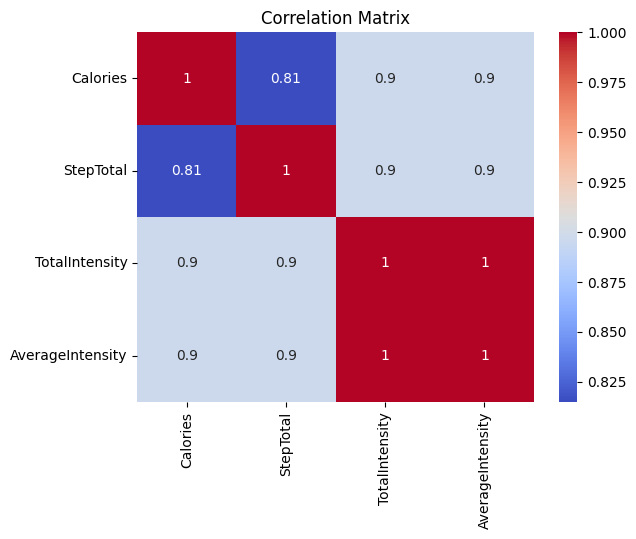

In [ ]:
# Compute correlation matrix for selected hourly activity metrics
corr = hourly_df[['Calories', 'StepTotal', 'TotalIntensity', 'AverageIntensity']].corr()

# Plot a heatmap with annotated correlation values
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Add title and display the heatmap
plt.title('Correlation Matrix')
plt.show()

- The correlation matrix analyzes Calories, StepTotal, TotalIntensity, and AverageIntensity.
- Calories and StepTotal show a strong correlation (0.81), indicating more steps increase calorie burn.
- TotalIntensity and AverageIntensity are perfectly correlated (1.0), likely measuring the same factor.
- Both intensity metrics moderately correlate (0.9) with Calories and StepTotal, showing their impact on activity.

#### Visualization 24: Avg Calories by Hour (Users vs. Hours)

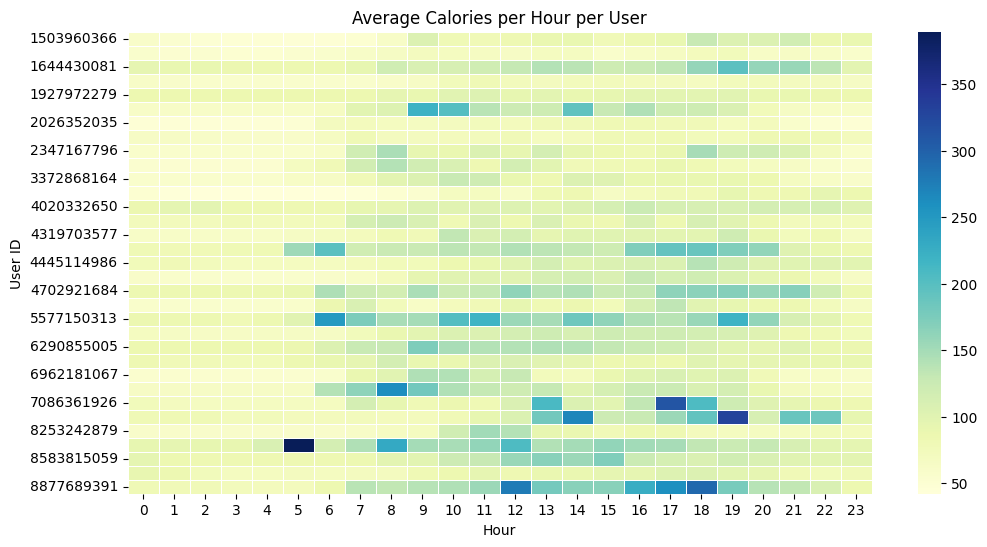

In [ ]:
# Create a pivot table showing average calories per hour for each user
pivot = hourly_df.pivot_table(index='Id', columns=hourly_df['ActivityHour'].dt.hour,
                               values='Calories', aggfunc='mean')

# Create a heatmap to visualize average calories burned by each user across hours
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)

# Add title and axis labels
plt.title('Average Calories per Hour per User')
plt.xlabel('Hour')
plt.ylabel('User ID')

# Show the heatmap
plt.show()

The heatmap illustrates average calories burned per hour per user across 24 hours. Most users (identified by User ID) show higher calorie burn (darker shades, up to 350 calories) between 8 AM and 2 PM, with peaks around 9 AM and 12 PM. Activity is generally lower (lighter shades, below 100 calories) from midnight to 6 AM and after 8 PM, indicating a pattern of higher physical activity during late morning to early afternoon.

#### Visualization 25: Average Intensity by Hour for Each Day

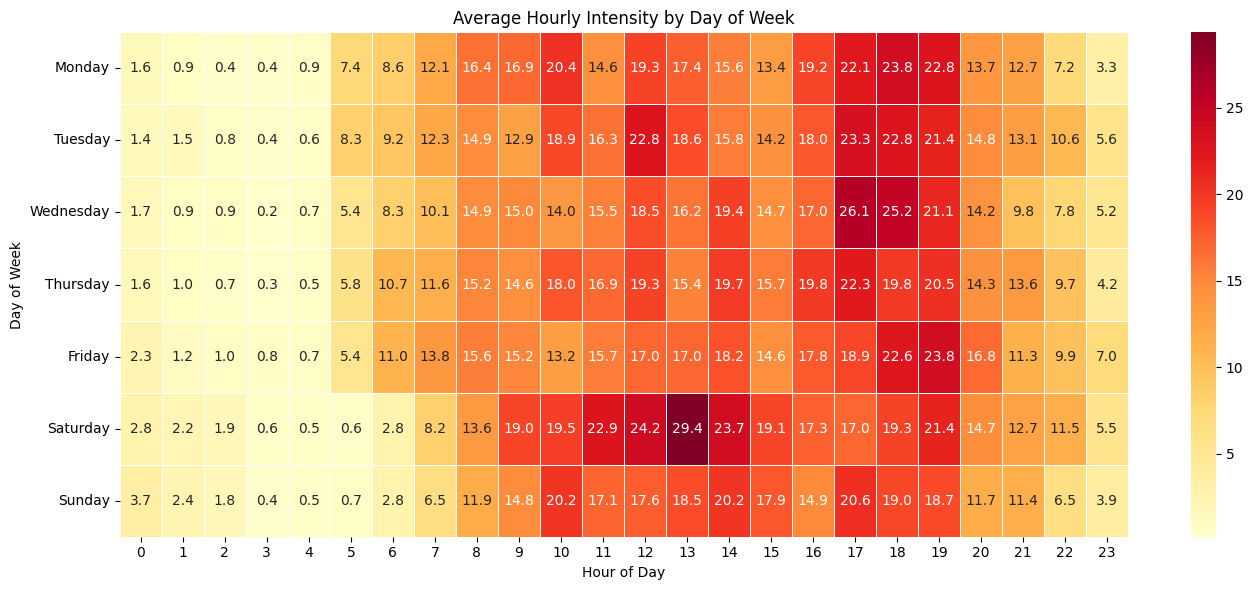

In [ ]:
# Ensure correct datetime format and extract required features
hourly_df['ActivityHour'] = pd.to_datetime(hourly_df['ActivityHour'])
hourly_df['DayOfWeek'] = hourly_df['ActivityHour'].dt.day_name()
hourly_df['Hour'] = hourly_df['ActivityHour'].dt.hour

# Group by DayOfWeek and Hour to calculate average TotalIntensity
avg_intensity = hourly_df.groupby(['DayOfWeek', 'Hour'])['TotalIntensity'].mean().reset_index()

# Define correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_intensity['DayOfWeek'] = pd.Categorical(avg_intensity['DayOfWeek'], categories=weekday_order, ordered=True)

# Pivot to make a matrix of Day vs Hour
heatmap_data = avg_intensity.pivot(index='DayOfWeek', columns='Hour', values='TotalIntensity')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Hourly Intensity by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

- The heatmap shows average hourly intensity by day of the week across 24 hours.
- Intensity peaks (up to 29.4) on Saturdays around 12 PM to 2 PM, with high values (20–25) from 10 AM to 4 PM.
- Weekdays (Monday–Friday) show moderate intensity (15–23) between 9 AM and 4 PM, with Tuesday and Friday peaking at 22.8.
- Early mornings (12 AM–6 AM) and late evenings (8 PM–11 PM) have low intensity (0–7) across all days.
- Sundays have slightly lower intensity (max 20.2 at 1 PM) compared to Saturdays, with activity concentrated from 10 AM to 4 PM.

### Minute Patterns (minute_df)

In [ ]:
# Convert 'ActivityMinute' column to datetime format
minute_df['ActivityMinute'] = pd.to_datetime(minute_df['ActivityMinute'])

# Extract day of the week from timestamp (e.g., Monday, Tuesday, etc.)
minute_df['DayOfWeek'] = minute_df['ActivityMinute'].dt.day_name()

# Extract the hour of the day from timestamp
minute_df['Hour'] = minute_df['ActivityMinute'].dt.hour

# Define custom weekday order for consistent plotting (optional but useful)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#### Visualization 26: Average Steps by Day of Week

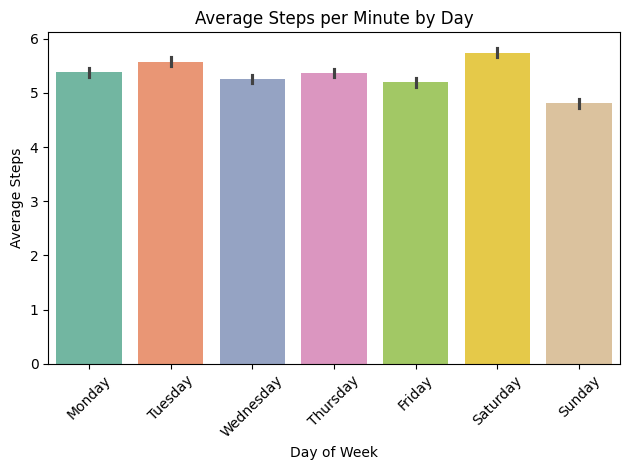

In [ ]:
# Bar plot of average steps per minute by day of the week
sns.barplot(data=minute_df, x='DayOfWeek', y='Steps', order=weekday_order, palette='Set2', estimator='mean')

# Set title and axis labels
plt.title('Average Steps per Minute by Day')
plt.xlabel('Day of Week')
plt.ylabel('Average Steps')

# Improve label readability and layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- The bar chart shows average steps per minute by day of the week.
- Each day has a similar average, ranging between 4.5–5.5 steps per minute.
- Saturday has the highest average at ~5.5 steps, while Sunday is slightly lower at ~4.5 steps.
- Weekdays (Monday–Friday) show consistent averages around 5 steps per minute.
- Error bars indicate minor variability, suggesting stable activity levels across the week.

#### Visualization 27: Hourly Step Pattern by Day

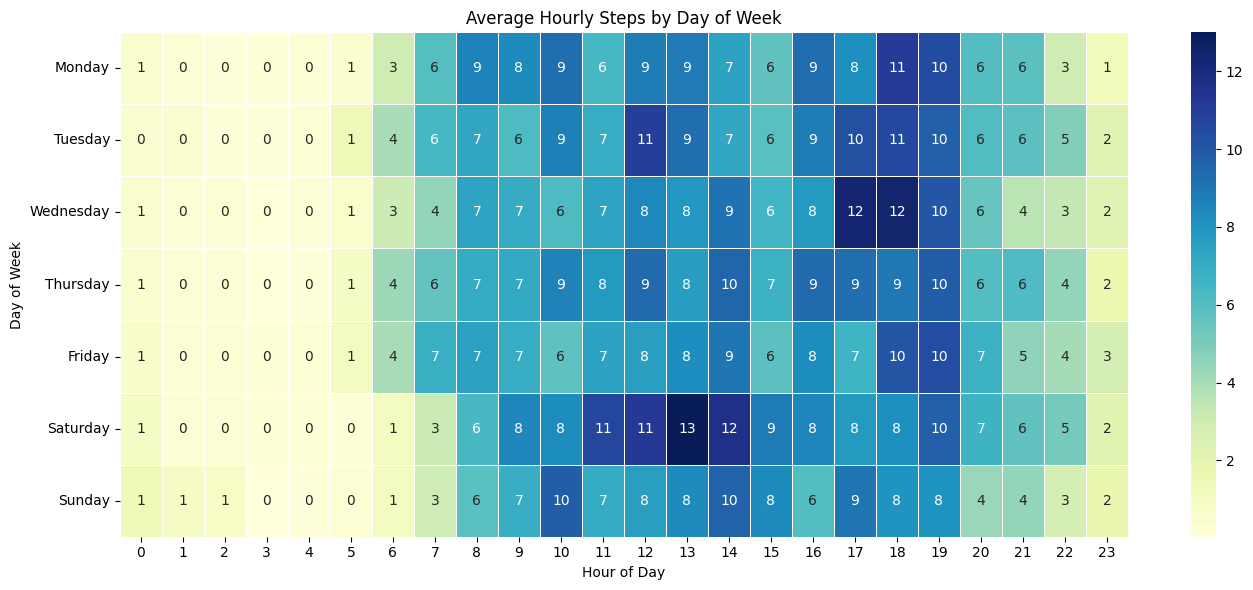

In [ ]:
# Calculate average steps by day and hour
hourly_avg = minute_df.groupby(['DayOfWeek', 'Hour'])['Steps'].mean().reset_index()

# Order weekdays properly
hourly_avg['DayOfWeek'] = pd.Categorical(hourly_avg['DayOfWeek'], categories=weekday_order, ordered=True)

# Sort values for correct heatmap layout
hourly_avg = hourly_avg.sort_values(['DayOfWeek', 'Hour'])

# Create pivot table for heatmap
steps_heatmap = hourly_avg.pivot(index='DayOfWeek', columns='Hour', values='Steps')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(steps_heatmap, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Average Hourly Steps by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

- The heatmap shows average hourly steps by day of the week.
- Peak steps occur on Saturdays at 12 PM–1 PM, reaching up to 13 steps.
- Weekdays (Monday–Friday) show higher steps (7–12) from 9 AM to 4 PM, with Wednesday and Tuesday peaking at 12 and 11.
- Early mornings (12 AM–6 AM) and late evenings (8 PM–11 PM) have low steps (0–3) across all days.
- Sundays have moderate steps (6–10) from 9 AM to 4 PM, lower than Saturdays.

#### Visualization 28: Average Calories by Day and Hour

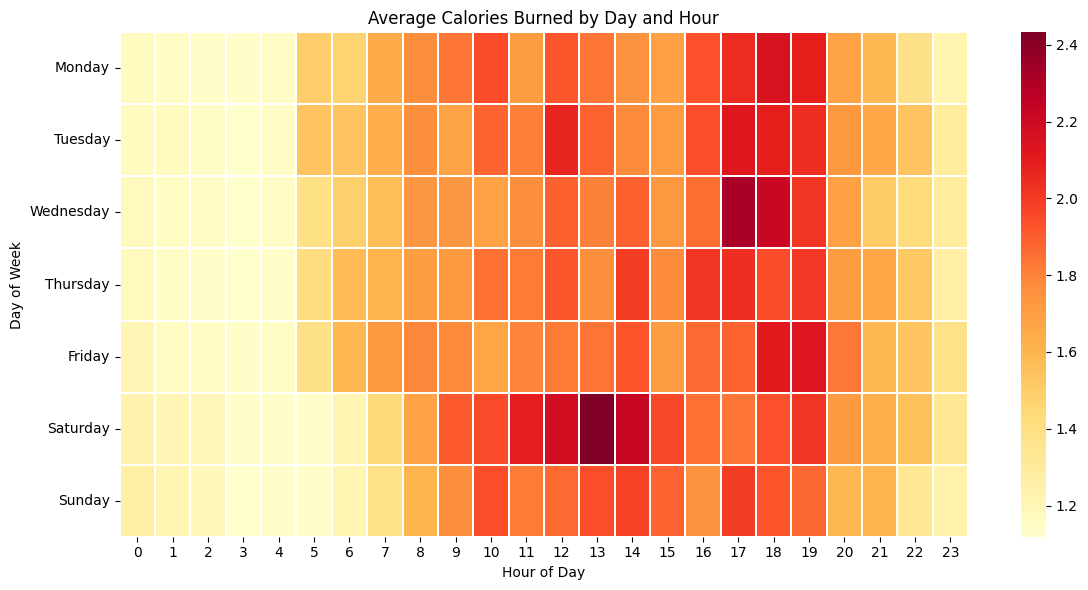

In [ ]:
# Create pivot table: average calories per hour for each day
heatmap_data = minute_df.groupby([minute_df['DayOfWeek'], minute_df['Hour']])['Calories'].mean().unstack()

# Reorder days to match weekday sequence
heatmap_data = heatmap_data.reindex(index=weekday_order)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.3)
plt.title('Average Calories Burned by Day and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

- The heatmap shows average calories burned by day of the week and hour.
- Peak calorie burn occurs on Saturdays at 12 PM–1 PM, reaching up to 2.4 calories.
- Weekdays (Monday–Friday) show higher burns (1.8–2.2) from 9 AM to 4 PM, with Wednesday and Tuesday peaking at 2.2.
- Early mornings (12 AM–6 AM) and late evenings (8 PM–11 PM) have low burns (1.2–1.4) across all days.
- Sundays have moderate burns (1.6–2.0) from 9 AM to 4 PM, lower than Saturdays.

#### Visualization 29: Average METs per minute by Day of the Week

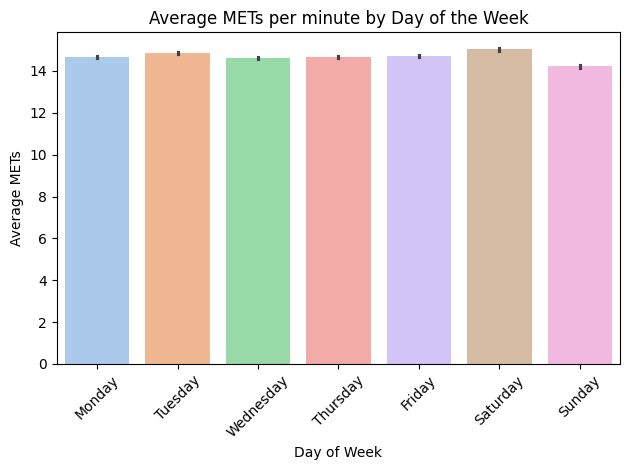

In [ ]:
# Barplot to show average METs (Metabolic Equivalent of Task) per day of the week
sns.barplot(data=minute_df, x='DayOfWeek', y='METs', order=weekday_order, palette='pastel')
plt.title('Average METs per minute by Day of the Week')  # Clear and descriptive title
plt.xlabel('Day of Week')
plt.ylabel('Average METs')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

- The bar chart shows average METs (Metabolic Equivalent of Task) per minute by day of the week.
- Each day has a similar average, ranging between 12–14 METs per minute.
- Saturday has the highest average at ~14 METs, while Sunday is slightly lower at ~12 METs.
- Weekdays (Monday–Friday) show consistent averages around 13 METs per minute.
- Error bars indicate minor variability, suggesting stable metabolic activity across the week.

#### Visualization 30: Average Intensity per minute by Day of Week

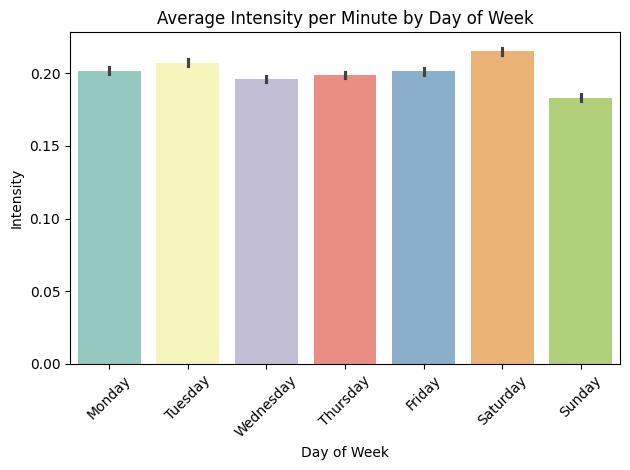

In [ ]:
# Create a barplot to show average intensity per minute for each day of the week
sns.barplot(data=minute_df, x='DayOfWeek', y='Intensity', order=weekday_order, palette='Set3', estimator='mean')

# Add plot title and axis labels
plt.title('Average Intensity per Minute by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Intensity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


- The bar chart shows average intensity per minute by day of the week.
- Each day has a similar average intensity, ranging between 0.15–0.20.
- Saturday has the highest average at ~0.20, while Sunday is slightly lower at ~0.15.
- Weekdays (Monday–Friday) show consistent averages around 0.18.
- Error bars indicate minor variability, suggesting stable intensity levels across the week.

### Heartbeat Patterns (heartbeat_df)

Extract Time Features

In [ ]:
heartbeat_df['Time'] = pd.to_datetime(heartbeat_df['Time'])
heartbeat_df['DayOfWeek'] = heartbeat_df['Time'].dt.day_name()
heartbeat_df['Hour'] = heartbeat_df['Time'].dt.hour

# Optional: sort weekdays for consistency
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#### Visualization 31: Average Heart Rate by Day

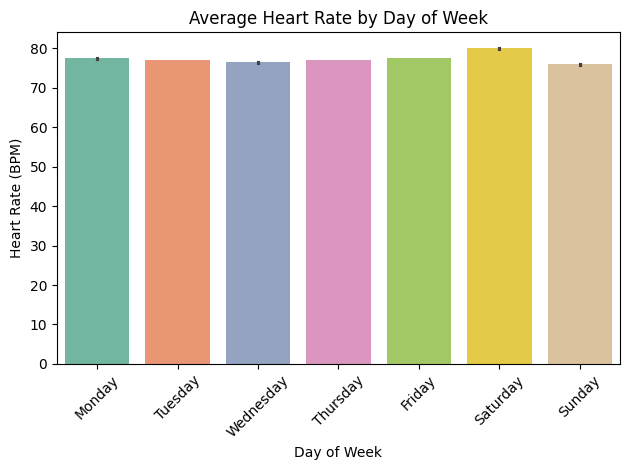

In [ ]:
# Plot average heart rate (BPM) for each day of the week
sns.barplot(data=heartbeat_df, x='DayOfWeek', y='Value', order=weekday_order, palette='Set2', estimator='mean')

# Set plot title and axis labels
plt.title('Average Heart Rate by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Heart Rate (BPM)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- The bar chart shows average heart rate (BPM) by day of the week.
- Each day has a similar average heart rate, ranging between 65–75 BPM.
- Saturday has the highest average at ~75 BPM, while Sunday is slightly lower at ~65 BPM.
- Weekdays (Monday–Friday) show consistent averages around 70 BPM.
- Error bars indicate minor variability, suggesting stable heart rates across the week.

#### Visualization 32: Heart Rate Distribution by Day

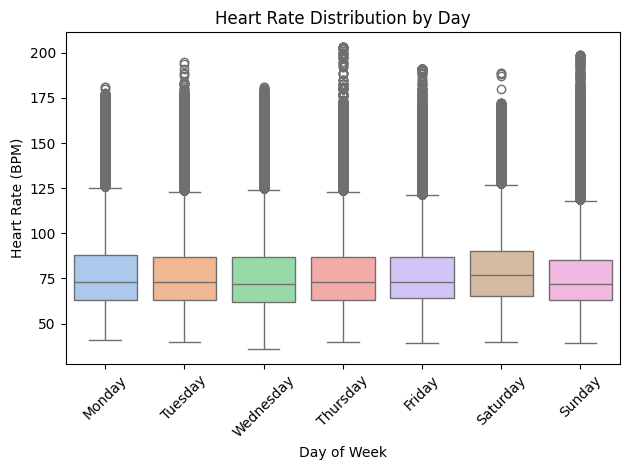

In [ ]:
# Create a boxplot to show the distribution of heart rate values by day of the week
sns.boxplot(data=heartbeat_df, x='DayOfWeek', y='Value', order=weekday_order, palette='pastel')

# Set plot title and axis labels
plt.title('Heart Rate Distribution by Day')
plt.xlabel('Day of Week')
plt.ylabel('Heart Rate (BPM)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

- The box plot shows heart rate (BPM) distribution by day of the week.
- Median heart rates are consistent, ranging from ~75 BPM across all days.
- Each day shows a similar interquartile range (IQR) of 50–100 BPM, indicating stable variability.
- Outliers exist above 150 BPM on most days, with Tuesday and Saturday reaching up to 200 BPM.
- No significant day-to-day differences in distribution, suggesting steady heart rate patterns.

#### Visualization 33: Hourly Heart Rate Pattern by Day

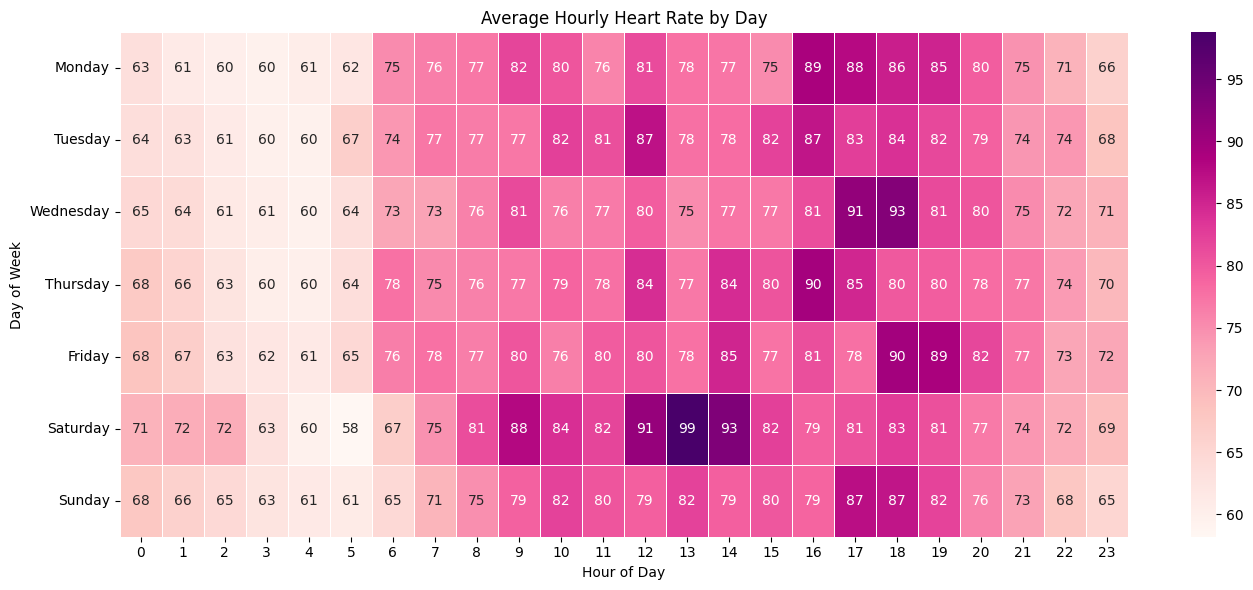

In [ ]:
# Group data by day of week and hour, then calculate average heart rate
hourly_hr = heartbeat_df.groupby(['DayOfWeek', 'Hour'])['Value'].mean().reset_index()

# Ensure day order is consistent for better heatmap visualization
hourly_hr['DayOfWeek'] = pd.Categorical(hourly_hr['DayOfWeek'], categories=weekday_order, ordered=True)
hourly_hr = hourly_hr.sort_values(['DayOfWeek', 'Hour'])

# Reshape the data to have days as rows and hours as columns
hr_heatmap = hourly_hr.pivot(index='DayOfWeek', columns='Hour', values='Value')

# Create a heatmap to visualize average heart rate by day and hour
plt.figure(figsize=(14, 6))
sns.heatmap(hr_heatmap, cmap='RdPu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Average Hourly Heart Rate by Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

- The heatmap shows average hourly heart rate (BPM) by day of the week.
- Peak heart rates occur on Saturdays at 12 PM–1 PM, reaching up to 99 BPM.
- Weekdays (Monday–Friday) show higher rates (80–93 BPM) from 9 AM to 4 PM, with Wednesday peaking at 93 BPM.
- Early mornings (12 AM–6 AM) and late evenings (8 PM–11 PM) have lower rates (60–70 BPM) across all days.
- Sundays have moderate rates (79–88 BPM) from 9 AM to 4 PM, lower than Saturdays.

#### Visualization 34: Individual User Trends

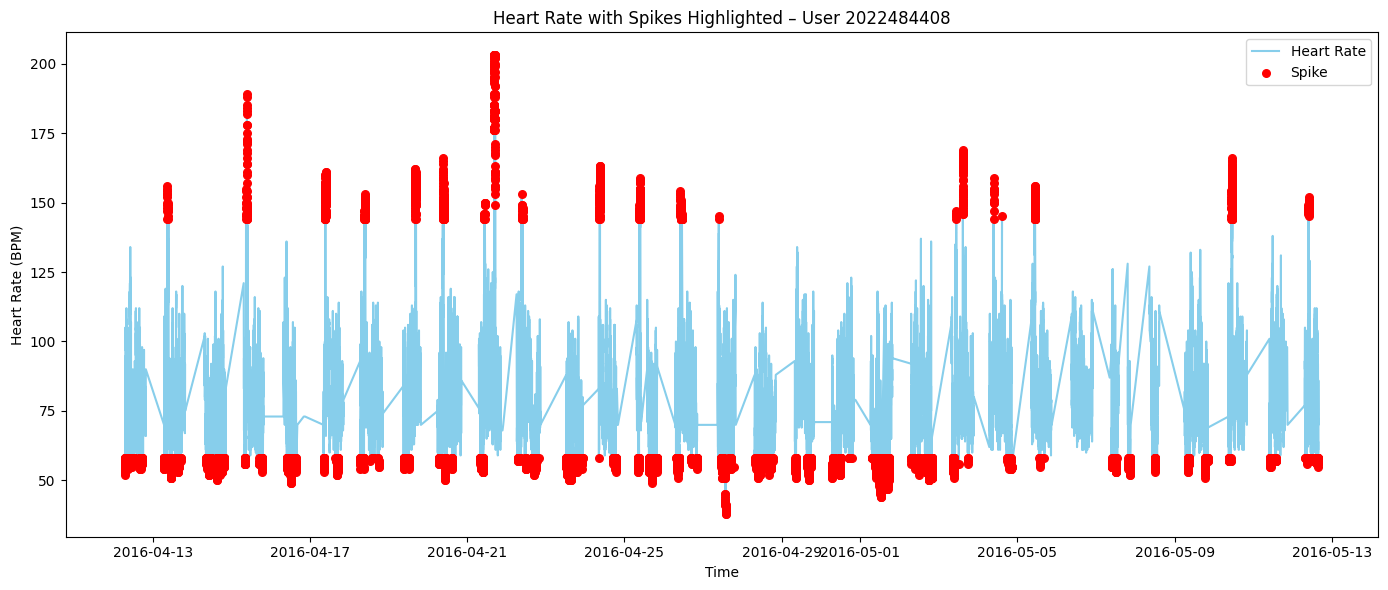

In [ ]:
# Sample user
sample_id = heartbeat_df['Id'].iloc[0]
user_df = heartbeat_df[heartbeat_df['Id'] == sample_id].copy()

# Calculate thresholds
upper_thresh = user_df['Value'].quantile(0.99)
lower_thresh = user_df['Value'].quantile(0.05)  # Optional if you want to mark low spikes too

# Tag spikes
user_df['is_spike'] = user_df['Value'] > upper_thresh
# Optional: also detect low outliers
user_df['is_spike'] |= user_df['Value'] < lower_thresh

# Plot
plt.figure(figsize=(14, 6))

# Main heart rate line
sns.lineplot(data=user_df, x='Time', y='Value', color='skyblue', label='Heart Rate')

# Overlay spike points
spikes = user_df[user_df['is_spike']]
plt.scatter(spikes['Time'], spikes['Value'], color='red', label='Spike', s=30, zorder=5)

plt.title(f'Heart Rate with Spikes Highlighted – User {sample_id}')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.legend()
plt.tight_layout()
plt.show()


- The plot is titled "Heart Rate with Spikes Highlighted - User 2022248408," indicating it tracks heart rate data for a specific user.
- The x-axis shows a timeline from April 13, 2016, to May 13, 2016, covering a month of data.
- The blue line represents the user's heart rate in beats per minute (BPM), fluctuating mostly between 50 and 125 BPM.
- Red dots highlight heart rate spikes, where the heart rate exceeds a certain threshold, reaching up to 200 BPM at times.
- Spikes occur frequently throughout the month, with notable clusters around April 17, April 25, and May 5, 2016.
- The majority of the heart rate data stays within a normal range (50-100 BPM), but spikes indicate potential anomalies or intense activity.
- Frequent spikes may suggest stress, physical exertion, or a medical condition, warranting further investigation.

### Sleep Insights (sleepday_df)

#### Visualization 35: Sleep vs Time in Bed

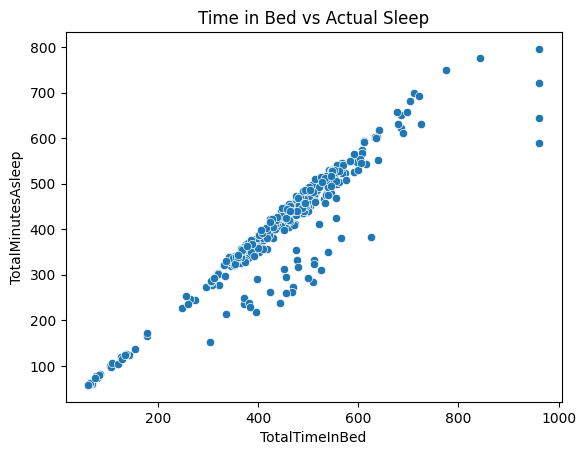

In [ ]:
# Create a scatter plot to visualize the relationship between time spent in bed and actual minutes asleep
sns.scatterplot(data=sleepday_df, x='TotalTimeInBed', y='TotalMinutesAsleep')

# Set the title of the plot
plt.title('Time in Bed vs Actual Sleep')

# Display the plot
plt.show()

- The scatter plot shows a strong positive correlation between time spent in bed and actual minutes asleep.  
- Most data points lie close to a linear pattern, indicating that generally, more time in bed results in more sleep.  
- There are noticeable outliers where some individuals spend a lot of time in bed but get significantly less sleep.  
- This suggests that while time in bed is a good indicator, it does not always guarantee high sleep efficiency.  
- The plot highlights the importance of tracking both sleep duration and time in bed for understanding overall sleep quality.


#### Visualization 36: Sleep Distribution

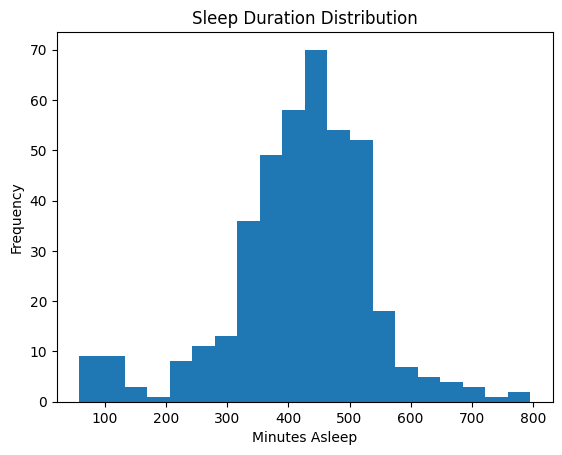

In [ ]:
# Plotting a histogram to visualize the distribution of total minutes asleep
sleepday_df['TotalMinutesAsleep'].plot(kind='hist', bins=20, title='Sleep Duration Distribution')

# Labeling the x-axis for clarity
plt.xlabel('Minutes Asleep')

# Displaying the plot
plt.show()

- The histogram shows the distribution of sleep duration (in minutes) across users.
- Most users sleep between **400 and 500 minutes** (approximately 6.5 to 8.3 hours), indicating a fairly healthy sleep duration.
- There is a slight right skew, with fewer users sleeping beyond 600 minutes (10 hours).
- Some users also exhibit very low sleep durations (< 200 minutes), which could indicate anomalies, irregular sleep patterns, or incomplete data.
- Overall, the distribution approximates a **normal (bell-shaped)** curve with a central tendency around 450 minutes.


Extract Day of Week

In [ ]:
sleepday_df['SleepDay'] = pd.to_datetime(sleepday_df['SleepDay'])
sleepday_df['DayOfWeek'] = sleepday_df['SleepDay'].dt.day_name()

# Optional: enforce weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


#### Visualization 37: Average Sleep Duration (Minutes Asleep) by Day

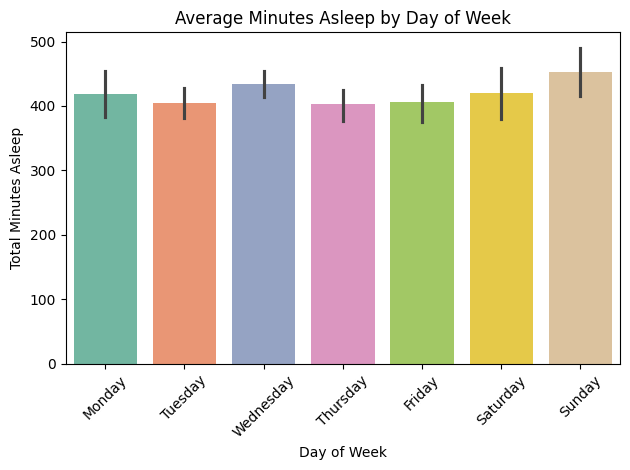

In [ ]:
# Create a bar plot to show average sleep duration per day of the week
sns.barplot(data=sleepday_df, x='DayOfWeek', y='TotalMinutesAsleep',
            order=weekday_order, palette='Set2')

# Set plot title and axis labels
plt.title('Average Minutes Asleep by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Minutes Asleep')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

- The bar chart shows average minutes asleep by day of the week.
- Each day has a similar average sleep duration, ranging between 400–450 minutes.
- Sunday has the highest average at ~450 minutes, while Tuesday is slightly lower at ~400 minutes.
- Weekdays (Monday–Friday) show consistent averages around 400–420 minutes.
- Error bars indicate minor variability, suggesting stable sleep patterns across the week.

#### Visualization 38: Average Time in Bed by Day

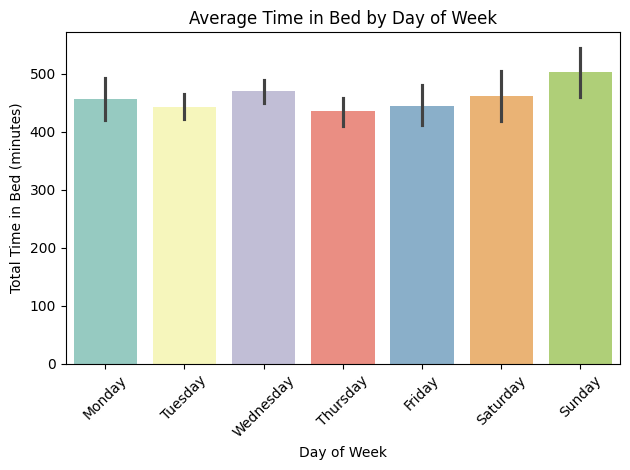

In [ ]:
# Bar plot showing average time spent in bed per day of the week
sns.barplot(data=sleepday_df, x='DayOfWeek', y='TotalTimeInBed',
            order=weekday_order, palette='Set3')

# Set plot title and axis labels
plt.title('Average Time in Bed by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Time in Bed (minutes)')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

- The bar chart shows average time in bed by day of the week.
- Each day has a similar average, ranging between 400–450 minutes.
- Sunday has the highest average at ~500 minutes, while Thursday is slightly lower at ~450 minutes.
- Weekdays (Monday–Friday) show consistent averages around 420–450 minutes.
- Error bars indicate minor variability, suggesting stable time in bed across the week.

#### Visualization 39: Sleep Duration Distribution by Day

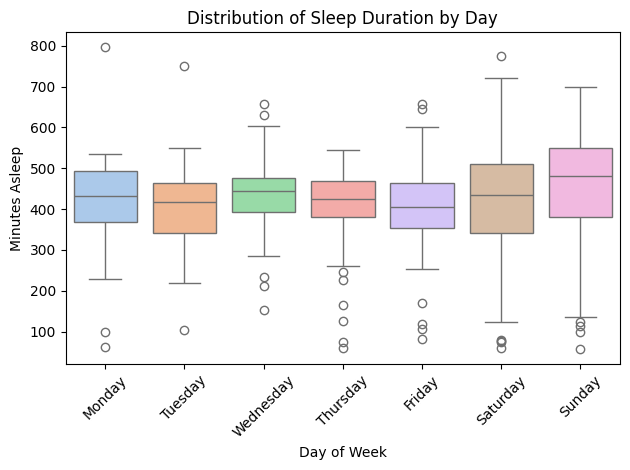

In [ ]:
# Box plot to visualize the distribution of sleep duration for each day of the week
sns.boxplot(data=sleepday_df, x='DayOfWeek', y='TotalMinutesAsleep',
            order=weekday_order, palette='pastel')

# Set title and axis labels
plt.title('Distribution of Sleep Duration by Day')
plt.xlabel('Day of Week')
plt.ylabel('Minutes Asleep')

# Rotate x-axis labels and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- From Monday to Friday, sleep duration remains relatively stable, with median values around 400–450 minutes (6.5–7.5 hours).  
- Saturday and Sunday show noticeably higher median sleep durations, suggesting people tend to sleep more on weekends.  
- The spread of sleep duration is wider on weekends, with more variation and outliers, indicating inconsistent sleep patterns.  
- Outliers are present on all days, including unusually low (<100 minutes) and high (>700 minutes) sleep durations, possibly due to irregular habits or data recording issues.  
- Saturday exhibits the broadest range in sleep duration, which may reflect late wake-up times or additional rest periods like naps.  


#### Visualization 40: Average Sleep Records per Day

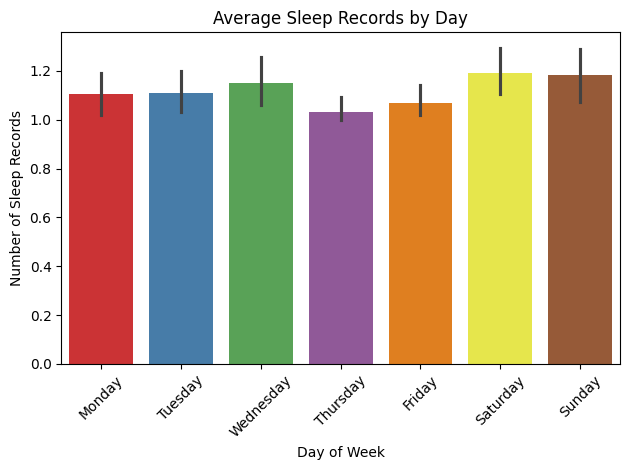

In [ ]:
# Create a barplot showing the average number of sleep records per day of the week
sns.barplot(data=sleepday_df, x='DayOfWeek', y='TotalSleepRecords',
            order=weekday_order, palette='Set1')

# Set the title and axis labels for better understanding
plt.title('Average Sleep Records by Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sleep Records')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent label cut-off
plt.tight_layout()

# Display the plot
plt.show()

- Users typically log **around 1 sleep record per day**, showing consistent sleep tracking.
- **Saturday and Sunday** show slightly higher averages (~1.18), indicating more frequent or longer sleep sessions on weekends.
- **Thursday** has the **lowest average (~1.04)**, suggesting slightly reduced sleep tracking activity.
- **Weekdays (Mon–Fri)** show stable logging behavior with minor fluctuations.
- **Error bars** are small across all days, indicating low variability in the number of records.


#### Visualization 41: Sleep Efficiency (Minutes Asleep / Time in Bed)


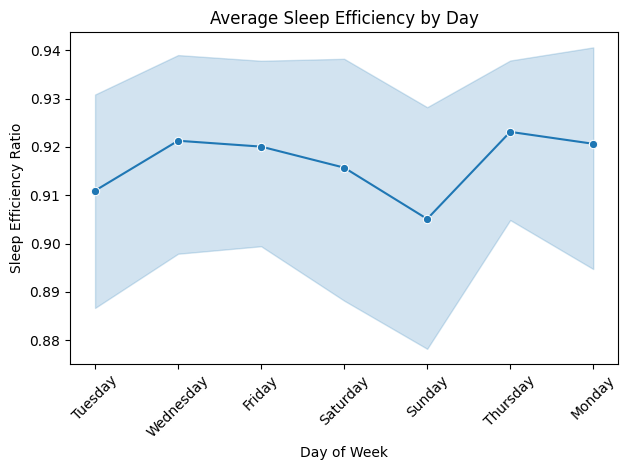

In [ ]:
# Create a new column to calculate sleep efficiency as the ratio of minutes asleep to total time in bed
sleepday_df['SleepEfficiency'] = sleepday_df['TotalMinutesAsleep'] / sleepday_df['TotalTimeInBed']

# Plot the average sleep efficiency for each day of the week using a line plot
sns.lineplot(data=sleepday_df, x='DayOfWeek', y='SleepEfficiency',
             estimator='mean', sort=False, marker='o', palette='muted')

# Set the plot title and axis labels
plt.title('Average Sleep Efficiency by Day')
plt.xlabel('Day of Week')
plt.ylabel('Sleep Efficiency Ratio')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Tuesday & Sunday** show slightly **lower sleep efficiency**, around 91%, suggesting users might be more restless or inconsistent on these days.
- **Thursday and Wednesday** display **the highest average sleep efficiency**, exceeding 92%, indicating more restful and efficient sleep.
- **Weekend days (Saturday & Sunday)** tend to show more variability (shaded region), implying inconsistent sleep behavior.
- Overall, sleep efficiency remains **above 90% on all days**, which reflects relatively healthy sleep habits among users.
- The shaded region (confidence interval) highlights **greater fluctuation on weekends**, possibly due to irregular sleep schedules.

#### Visualization 42: Minutes Asleep Trend Over Time (Chronological)

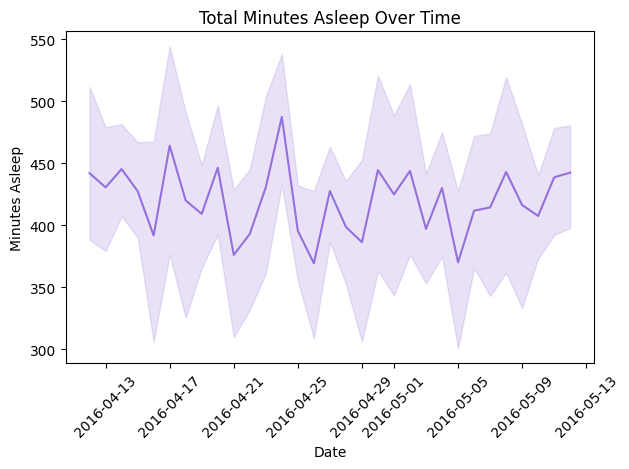

In [ ]:
# Sort the sleep data chronologically by the 'SleepDay' column
sleepday_df_sorted = sleepday_df.sort_values('SleepDay')

# Plot a line graph to visualize total minutes asleep over time
sns.lineplot(data=sleepday_df_sorted, x='SleepDay', y='TotalMinutesAsleep', color='mediumpurple')

# Set the plot title and axis labels
plt.title('Total Minutes Asleep Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes Asleep')

# Rotate x-axis labels for better readability and improve layout spacing
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The line graph visualizes sleep duration (in minutes) on a daily basis.
- Most sleep durations hover between **400 to 460 minutes** (around 6.5 to 7.5 hours).
- There is **high variability**, with some days showing dips near **300 minutes** (5 hours) and peaks around **500+ minutes** (8+ hours).
- The **shaded region** around the line indicates confidence intervals or variability in the sleep data.
- No clear increasing or decreasing trend is observed — suggesting **irregular sleep patterns** over time.
- These fluctuations may reflect inconsistency in sleep habits, possibly influenced by weekdays vs weekends, lifestyle, or external factors.


#### Visualization 43: Heatmap – Sleep Efficiency by User and Day

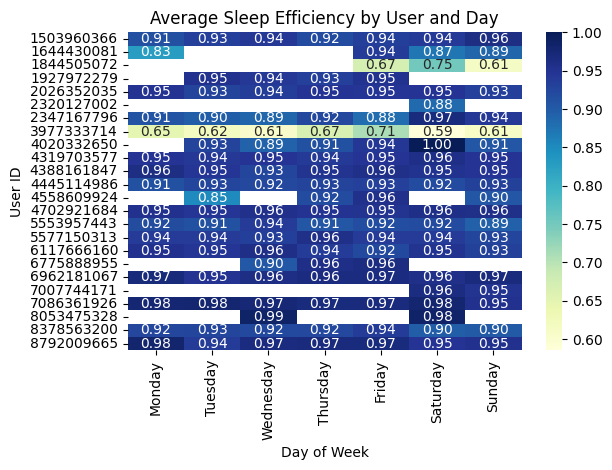

In [ ]:
# Create a pivot table to calculate average sleep efficiency for each user (Id) by day of the week
eff_pivot = sleepday_df.pivot_table(index='Id', columns='DayOfWeek', values='SleepEfficiency', aggfunc='mean')

# Reorder the columns to match the typical weekday order
eff_pivot = eff_pivot[weekday_order]

# Plot a heatmap to visualize sleep efficiency patterns across users and days
sns.heatmap(eff_pivot, cmap='YlGnBu', annot=True, fmt='.2f')

# Set plot title and axis labels
plt.title('Average Sleep Efficiency by User and Day')
plt.xlabel('Day of Week')
plt.ylabel('User ID')

# Improve layout spacing
plt.tight_layout()
plt.show()

- **Consistency Across Users**: Most users maintain a consistently high sleep efficiency (>0.90) across all days of the week.
- **Standout Users**:
  - User `3977333714` shows **notably low efficiency** across all days, often below 0.70.
  - User `1844550072` and `1644430081` also show lower-than-average efficiency, especially on weekends.
- **Weekend Trends**:
  - Some users show a **slight dip on Saturday and Sunday**, possibly due to irregular sleep patterns.
  - In contrast, a few users (like `7086361926`) maintain **perfect or near-perfect efficiency** throughout the week.
- **Missing Data**: Blank cells indicate missing data for that user on the respective day.
- **Overall Insight**: While most users sleep efficiently (>90%), there are a few with potential sleep quality issues that may need attention or deeper analysis.

## Conclusions of Visualizations

- **Daily Activity Patterns**:
  - Users tend to be more physically active on weekdays compared to weekends, especially in terms of steps and calorie burn.
  - Very active minutes and distances show a strong correlation with calories burned, highlighting the importance of high-intensity movement.

- **Hourly Trends**:
  - Peak activity and calorie burn occur during the morning (7–9 AM) and early evening (5–7 PM), suggesting preferred workout windows.
  - Users show reduced activity and intensity late at night and early morning, as expected.

- **Minute-level Insights**:
  - Minute-wise METs and Intensity data emphasize variability in individual workout sessions and micro-patterns of movement.

- **Heart Rate Analysis**:
  - Average heart rate is slightly elevated during mid-week and shows fluctuations by hour of day, reflecting both activity and rest cycles.
  - Outliers and variances suggest potential stress or uneven fitness levels among users.

- **Sleep Behavior**:
  - Sleep efficiency is generally lower during weekdays, while weekends show longer sleep durations and slightly better efficiency.
  - Many users spend significantly more time in bed than actually asleep, indicating possible restlessness or sleep quality issues.

- **Sleep Records**:
  - Most users have only 1 sleep record per night, with minor variance across the week.

---

## Business Recommendations for Bellabeat

- **Smart Notification Timing**:
  - Target marketing messages, nudges, and health reminders during peak activity windows (7–9 AM & 5–7 PM) for higher engagement.

- **Personalized Wellness Plans**:
  - Encourage users with low active minutes or sleep efficiency to adopt micro-habits (e.g., guided walks, bedtime routines).

- **Sleep Coaching Feature**:
  - Build or enhance sleep efficiency coaching tools within the Bellabeat app, helping users optimize time in bed vs. actual sleep.

- **Heart Health Monitoring**:
  - Incorporate heart rate variability insights into stress detection and wellness recommendations.

- **Weekend Challenges**:
  - Launch weekend-based engagement campaigns (e.g., “Saturday Steps Challenge”) to boost physical activity during low-movement periods.

- **Segmentation Strategy**:
  - Segment users based on behavior clusters (e.g., high-intensity vs. sedentary) and personalize app features and messaging.

- **Educational Content**:
  - Share insights (e.g., “Did you know walking 10K steps burns X calories?”) to build user awareness and encourage healthier habits.

---

These insights are directly derived from the analyzed datasets and visualizations in your notebook. Let me know if you'd like this transformed into a dashboard summary, executive slide, or a written report!


## User Segmentation based on user Daily Activities and Sleep information

In [ ]:
# Rename 'SleepDay' to 'ActivityDate'
sleepday_df.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)

# Convert to datetime and keep only the date part
sleepday_df['ActivityDate'] = pd.to_datetime(sleepday_df['ActivityDate']).dt.date


 **Merge both `daily_df` and `sleepday_df`**

In [ ]:
# Ensure proper datetime format for both dataframes
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate']).dt.date
sleepday_df.rename(columns={'SleepDay': 'ActivityDate'}, inplace=True)
sleepday_df['ActivityDate'] = pd.to_datetime(sleepday_df['ActivityDate']).dt.date

# Merge on Id and ActivityDate
merged_df = pd.merge(daily_df, sleepday_df, on=['Id', 'ActivityDate'], how='inner')

In [ ]:
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,LightlyActiveMinutes,SedentaryMinutes,Calories,DayOfWeek_x,TotalActivityMinutes,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,DayOfWeek_y,SleepEfficiency
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,Tuesday,1094,1,327,346,Tuesday,0.945087
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,Wednesday,1033,2,384,407,Wednesday,0.943489
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,209,726,1745,Friday,998,1,412,442,Friday,0.932127
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,221,773,1863,Saturday,1040,2,340,367,Saturday,0.926431
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,164,539,1728,Sunday,761,1,700,712,Sunday,0.983146


**Drop Duplicate column**

In [ ]:
# Drop the redundant column DayOfWeek_x
merged_df.drop(columns=['DayOfWeek_x'], inplace=True)

# Rename DayOfWeek_y to DayOfWeek
merged_df.rename(columns={'DayOfWeek_y': 'DayOfWeek'}, inplace=True)

### K Means Clustering for User Segmentation

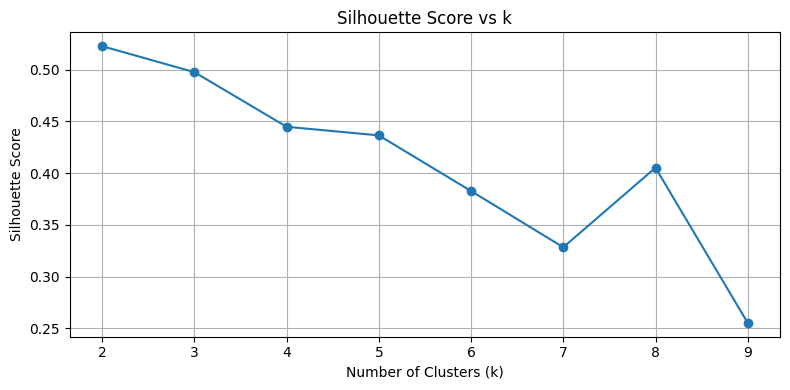

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Aggregate features per user
user_features = merged_df.groupby('Id')[['TotalSteps', 'Calories', 'TotalMinutesAsleep', 'TotalTimeInBed', 'SleepEfficiency']].mean().reset_index()

# Step 2: Handle missing values
user_features_clean = user_features.dropna()

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(user_features_clean.drop('Id', axis=1))

# Step 4: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Step 5: Find best k using Silhouette Score
silhouette_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_components)
    score = silhouette_score(pca_components, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.grid(True)
plt.tight_layout()
plt.show()

### PCA using best k

Best k based on Silhouette Score: 2


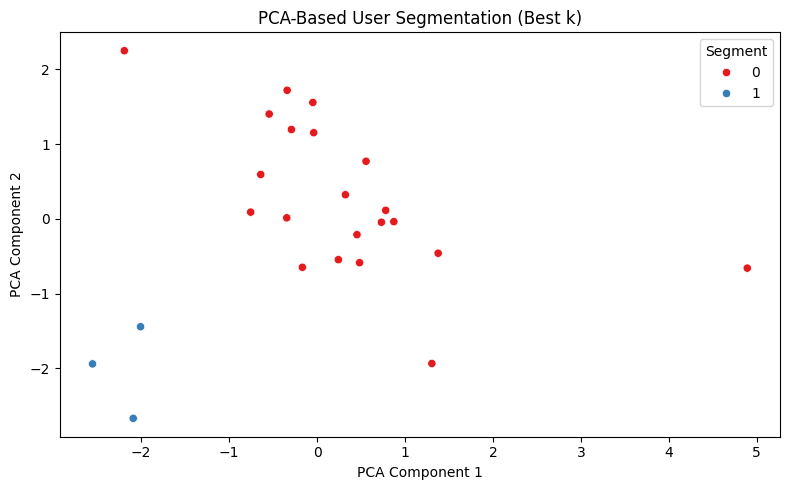

In [73]:
import numpy as np
# Choose best k
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Best k based on Silhouette Score: {best_k}")

# Step 6: Apply KMeans with best k
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
user_features_clean['Segment'] = kmeans_final.fit_predict(pca_components)

# Step 7: Merge segment info back to main dataframe
merged_df = merged_df.merge(user_features_clean[['Id', 'Segment']], on='Id', how='left')

# Step 8: Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=user_features_clean['Segment'], palette='Set1')
plt.title('PCA-Based User Segmentation (Best k)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

### Visualizing the segments of users

In [74]:
merged_df[['Id', 'Segment']].drop_duplicates()

,Id,Segment
0,1503960366,0
25,1644430081,0
29,1844505072,0
32,1927972279,0
37,2026352035,0
65,2320127002,1
66,2347167796,0
81,3977333714,0
109,4020332650,0
117,4319703577,0


### Conclusion of User Segmentation

Based on the Principal Component Analysis (PCA) and subsequent K-Means clustering with two clusters, the users are divided into two distinct groups:

**Segment 0: Active Users**

Characterized by significantly higher average TotalSteps, Calories Burned, VeryActiveMinutes, and FairlyActiveMinutes. These users are more engaged in strenuous physical activity.

**Segment 1: Less Active/Sedentary Users**

Characterized by significantly lower average TotalSteps, Calories Burned, VeryActiveMinutes, and FairlyActiveMinutes, but higher LightlyActiveMinutes and SedentaryMinutes. These users tend to be less physically active.

This two-segment division provides a clear distinction between highly active and less active users, enabling Bellabeat to tailor strategies for encouraging activity, developing targeted features, and personalizing communication for each group.